# 0.Carga de archivo

**Autor:** Jesús Oviedo Riquelme

[Github](https://github.com/jesusoviedo/clustering_func_publico)

[Fuente de los datos](https://datos.hacienda.gov.py/data/nomina)

[Enlace de acceso a los datos](https://drive.google.com/file/d/1p-S_Tle9ISpSmyvrTjmzHi7Ton0ieapi/view?usp=sharing)




Importo las librerias a utilizar a lo largo del cuaderno

In [86]:
# librerias para manejar fechas
import datetime as dt

# librerias para manipular dataset y trabajar con matices
import pandas as pd
import numpy as np

# librerias para graficos
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


Creo un Dataframe a partir de la lectura de un archivo.

*Entrada: url del archivo csv que contiene la nomina de funcionarios publicos del periodo 2023-07*

*Salida: dataframe con los datos de los funcionario publicos del periodo 2023-07.*

*   [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)

In [87]:
#df_nomina_funcionario = pd.read_csv("/content/drive/MyDrive/UNA-IA-Proyecto del diplomado/nomina-2023-07/nomina_2023-07.csv", encoding='latin-1')

file_id = '1p-S_Tle9ISpSmyvrTjmzHi7Ton0ieapi'
url = f'https://drive.google.com/uc?id={file_id}&export=download'
df_nomina_funcionario_2 = pd.read_csv(url, compression='zip', encoding='latin-1')

<ipython-input-87-7b42240bd02c>:5: DtypeWarning: Columns (18,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nomina_funcionario_2 = pd.read_csv(url, compression='zip', encoding='latin-1')


Genero una copia del DataFrame

*Entrada: dataframe con todas las variables*

*Salida: dataframe que es un copia del dataframe de entrada*

*   [copy](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html)
*   [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)


In [88]:
df_pre_nomina_funcionario = df_nomina_funcionario.copy()
df_pre_nomina_funcionario.head(5)

,anio,mes,codigoNivel,descripcionNivel,codigoEntidad,descripcionEntidad,codigoPrograma,descripcionPrograma,codigoSubprograma,descripcionSubprograma,...,montoDevengado,mesCorte,anioCorte,fechaCorte,nivelAbr,entidadAbr,programaAbr,subprogramaAbr,proyectoAbr,unidadAbr
0,2023,7,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,0,0 - *,...,3632977,9,2023,2023-09-05,PODER EJECUTIVO,MEC,PC,*,BSETCEEBYEM,VEPAGE
1,2023,7,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,0,0 - *,...,698249,9,2023,2023-09-05,PODER EJECUTIVO,MEC,PC,*,AG,DGA
2,2023,7,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,0,0 - *,...,227520,9,2023,2023-09-05,PODER EJECUTIVO,MEC,PC,*,AG,DGA
3,2023,7,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,0,0 - *,...,3632977,9,2023,2023-09-05,PODER EJECUTIVO,MEC,PC,*,BSEPSCEEB,VEPAGE
4,2023,7,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,0,0 - *,...,3632977,9,2023,2023-09-05,PODER EJECUTIVO,MEC,PC,*,BSEPSCEEB,VEPAGE


# 1.EAD - Análisis Exploratorio de Datos

## 1.1 Vision general

Visualizo las primeras filas de mi Dataset.

*Entrada: numero de filas a mostrar de mi Dataset*

*Salida: N registro de mi Dataset en base al numero ingresado como entrada*

*   [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)

In [89]:
df_nomina_funcionario.head(10)

,anio,mes,codigoNivel,descripcionNivel,codigoEntidad,descripcionEntidad,codigoPrograma,descripcionPrograma,codigoSubprograma,descripcionSubprograma,...,montoDevengado,mesCorte,anioCorte,fechaCorte,nivelAbr,entidadAbr,programaAbr,subprogramaAbr,proyectoAbr,unidadAbr
0,2023,7,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,0,0 - *,...,3632977,9,2023,2023-09-05,PODER EJECUTIVO,MEC,PC,*,BSETCEEBYEM,VEPAGE
1,2023,7,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,0,0 - *,...,698249,9,2023,2023-09-05,PODER EJECUTIVO,MEC,PC,*,AG,DGA
2,2023,7,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,0,0 - *,...,227520,9,2023,2023-09-05,PODER EJECUTIVO,MEC,PC,*,AG,DGA
3,2023,7,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,0,0 - *,...,3632977,9,2023,2023-09-05,PODER EJECUTIVO,MEC,PC,*,BSEPSCEEB,VEPAGE
4,2023,7,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,0,0 - *,...,3632977,9,2023,2023-09-05,PODER EJECUTIVO,MEC,PC,*,BSEPSCEEB,VEPAGE
5,2023,7,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,0,0 - *,...,240000,9,2023,2023-09-05,PODER EJECUTIVO,MEC,PC,*,AG,DGA
6,2023,7,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,0,0 - *,...,182406,9,2023,2023-09-05,PODER EJECUTIVO,MEC,PC,*,AG,DGA
7,2023,7,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,0,0 - *,...,307692,9,2023,2023-09-05,PODER EJECUTIVO,MEC,PC,*,BSEPSCEEB,VEPAGE
8,2023,7,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,0,0 - *,...,307692,9,2023,2023-09-05,PODER EJECUTIVO,MEC,PC,*,BSEPSCEEB,VEPAGE
9,2023,7,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,0,0 - *,...,615384,9,2023,2023-09-05,PODER EJECUTIVO,MEC,PC,*,BSETCEEBYEM,VEPAGE


Muestro la dimension de mi Dataset.

*Entrada: tupla que contiene el numero de filas y columnas de mi Dataset*

*Salida: mensaje indicando la cantidad de filas y columnas que tiene el Dataset*

*   [shape](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html)
*   [print](https://docs.python.org/3/library/functions.html#print)

In [90]:
dimension = df_nomina_funcionario.shape
print(f"El data frame contiene {dimension[0]} filas y {dimension[1]} columnas")

El data frame contiene 1113704 filas y 40 columnas


Muestro las columnas de mi Dataset.

*Entrada: indice que contiene el listado de las columnas que tiene el Dataset*

*Salida: variable que contiene el indice con las columnas del Dataset*

*   [columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html#)

In [91]:
atributos = df_nomina_funcionario.columns
atributos

Index(['anio', 'mes', 'codigoNivel', 'descripcionNivel', 'codigoEntidad',
       'descripcionEntidad', 'codigoPrograma', 'descripcionPrograma',
       'codigoSubprograma', 'descripcionSubprograma', 'codigoProyecto',
       'descripcionProyecto', 'codigoUnidadResponsable',
       'descripcionUnidadResponsable', 'codigoObjetoGasto', 'conceptoGasto',
       'fuenteFinanciamiento', 'linea', 'codigoPersona', 'nombres',
       'apellidos', 'sexo', 'discapacidad', 'codigoCategoria', 'cargo',
       'horasCatedra', 'fechaIngreso', 'tipoPersonal', 'lugar',
       'montoPresupuestado', 'montoDevengado', 'mesCorte', 'anioCorte',
       'fechaCorte', 'nivelAbr', 'entidadAbr', 'programaAbr', 'subprogramaAbr',
       'proyectoAbr', 'unidadAbr'],
      dtype='object')

Muestro información de completitud y tipo de datos de mi Dataset.

*Salida: un Dataframe con un resumen de las columnas, la cantidad de valores no null y el tipo de datos*

*   [info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

In [92]:
df_nomina_funcionario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113704 entries, 0 to 1113703
Data columns (total 40 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   anio                          1113704 non-null  int64  
 1   mes                           1113704 non-null  int64  
 2   codigoNivel                   1113704 non-null  int64  
 3   descripcionNivel              1113704 non-null  object 
 4   codigoEntidad                 1113704 non-null  int64  
 5   descripcionEntidad            1113704 non-null  object 
 6   codigoPrograma                1113704 non-null  int64  
 7   descripcionPrograma           1113704 non-null  object 
 8   codigoSubprograma             1113704 non-null  int64  
 9   descripcionSubprograma        1113704 non-null  object 
 10  codigoProyecto                1113704 non-null  int64  
 11  descripcionProyecto           1113704 non-null  object 
 12  codigoUnidadResponsable     

Genero un Dataframe que contenga la columna y su tipo

*Entrada: serie que contiene el tipo de dato de cada columna del Dataframe*

*Salida: dataframe con las columnas atributo y tipo*

*   [dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)
*   [reset_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)
*   [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)

In [93]:
df_tipo_col_nomina = pd.DataFrame(df_nomina_funcionario.dtypes, columns=["Tipo"]).reset_index(names=["Variable"])
df_tipo_col_nomina.head()

,Variable,Tipo
0,anio,int64
1,mes,int64
2,codigoNivel,int64
3,descripcionNivel,object
4,codigoEntidad,int64


Muestro un resumen de los tipos de datos de mi Dataset

*Entrada: dataframe que contiene el nombre del atributo y su tipo de dato*

*Salida: histograma que muestra el tipo de dato y la cantidad de atributos de para ese tipo*

*   [astype](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)
*   [subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)
*   [title](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html)
*   [xlabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html)
*   [ylabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html)
*   [show](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html)

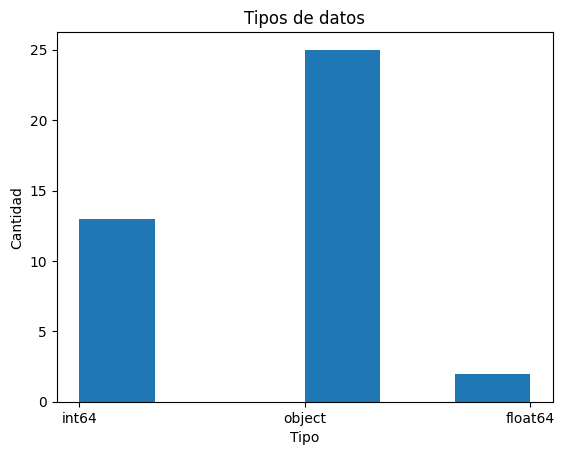

In [94]:
fig, ax = plt.subplots()

ax.hist(df_tipo_col_nomina["Tipo"].astype(str), bins=6)
plt.title("Tipos de datos")
plt.xlabel("Tipo")
plt.ylabel("Cantidad")
plt.show()

Muestro un listado de las variables de tipo object

*Entrada: dataframe que contiene todas las variables con su tipo de dato*

*Salida: dataframe que cotiene solo aquellas variables cuyo tipo sea object*

*   [subset_data](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html)

In [95]:
df_tipo_col_nomina[df_tipo_col_nomina["Tipo"] == "object"]

,Variable,Tipo
3,descripcionNivel,object
5,descripcionEntidad,object
7,descripcionPrograma,object
9,descripcionSubprograma,object
11,descripcionProyecto,object
13,descripcionUnidadResponsable,object
15,conceptoGasto,object
16,fuenteFinanciamiento,object
18,codigoPersona,object
19,nombres,object


Muestro un listado de las variables de tipo int

*Entrada: dataframe que contiene todas las variables con su tipo de dato*

*Salida: dataframe que cotiene solo aquellas variables cuyo tipo sea int*

*   [subset_data](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html)

In [96]:
df_tipo_col_nomina[df_tipo_col_nomina["Tipo"] == "int64"]


,Variable,Tipo
0,anio,int64
1,mes,int64
2,codigoNivel,int64
4,codigoEntidad,int64
6,codigoPrograma,int64
8,codigoSubprograma,int64
10,codigoProyecto,int64
12,codigoUnidadResponsable,int64
14,codigoObjetoGasto,int64
29,montoPresupuestado,int64


Muestro un listado de las variables de tipo float

*Entrada: dataframe que contiene todas las variables con su tipo de dato*

*Salida: dataframe que cotiene solo aquellas variables cuyo tipo sea float*

*   [subset_data](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html)

In [97]:
df_tipo_col_nomina[df_tipo_col_nomina["Tipo"] == "float64"]

,Variable,Tipo
17,linea,float64
25,horasCatedra,float64


## 1.2 Valores faltantes

Creo un Dataframe que contenga el nombre de la variable, cantidad registros/filas, cantidad de null, porcentaje de null y tipo de dato

*Entrada: tenemos multiples entradas las cuales son (1) una serie que contiene la suma de null, (2) numero de fillas, (3) calculo de porcentaje de null usando un dataframe que contiene las entradas de los puntos 1 y 2 y (4) un dataframe que contiene el nombre de las variables y su tipo de dato*

*Salida: dataframe con las siguientes columnas variable, cantidad null, cantidad total, 	porcentaje null y tipo*

*   [isnull](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html)
*   [sum](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)
*   [dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
*   [dictionaries](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)
*   [reset_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)
*   [add_columns](https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html#)
*   [round](https://docs.python.org/3/library/functions.html#round)
*   [join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html)
*   [drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)
*   [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)

In [98]:
cant_null = df_nomina_funcionario.isnull().sum()
cant_total = dimension[0]
resumen_columnas = pd.DataFrame(dict({"CantidadNull": cant_null, "CantidadTotal": cant_total})).reset_index(names=['Variable'])
resumen_columnas["PorcentajeNull"] = round(resumen_columnas["CantidadNull"] / resumen_columnas["CantidadTotal"], 3) * 100
resumen_columnas = resumen_columnas.join(df_tipo_col_nomina, rsuffix='_other').drop(columns=['Variable_other'])
resumen_columnas.head()

,Variable,CantidadNull,CantidadTotal,PorcentajeNull,Tipo
0,anio,0,1113704,0.0,int64
1,mes,0,1113704,0.0,int64
2,codigoNivel,0,1113704,0.0,int64
3,descripcionNivel,0,1113704,0.0,object
4,codigoEntidad,0,1113704,0.0,int64


Muestro un listado de las variables que no tienen valores faltantes

*Entrada: dataframe que contiene el nombre, cantidad total, cantidad de null, porcentaje y tipo de dato de las variables*

*Salida: dataframe que cotiene solo aquellas variables que no posean valores faltantes*

*   [subset_data](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html)

In [99]:
resumen_columnas[resumen_columnas["CantidadNull"] == 0]

,Variable,CantidadNull,CantidadTotal,PorcentajeNull,Tipo
0,anio,0,1113704,0.0,int64
1,mes,0,1113704,0.0,int64
2,codigoNivel,0,1113704,0.0,int64
3,descripcionNivel,0,1113704,0.0,object
4,codigoEntidad,0,1113704,0.0,int64
5,descripcionEntidad,0,1113704,0.0,object
6,codigoPrograma,0,1113704,0.0,int64
7,descripcionPrograma,0,1113704,0.0,object
8,codigoSubprograma,0,1113704,0.0,int64
9,descripcionSubprograma,0,1113704,0.0,object


Muestro un listado de las variables que tienen valores faltantes

*Entrada: dataframe que contiene el nombre, cantidad total, cantidad de null, porcentaje y tipo de dato de las variables*

*Salida: dataframe que cotiene solo aquellas variables que posean valores faltantes*

*   [subset_data](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html)

In [100]:
resumen_columnas[resumen_columnas["CantidadNull"] > 0]

,Variable,CantidadNull,CantidadTotal,PorcentajeNull,Tipo
17,linea,71217,1113704,6.4,float64
24,cargo,643,1113704,0.1,object
25,horasCatedra,1113704,1113704,100.0,float64
28,lugar,1109117,1113704,99.6,object


Muestro un grafico de barra de valores no faltantes por variable

*Entrada: dataframe que contiene todas las variables*

*Salida: grafico de barra que contiene las variables (eje x) y la cantidad de valores que contiene (eje y)*

*   [bar](https://github.com/ResidentMario/missingno#bar)

<Axes: >

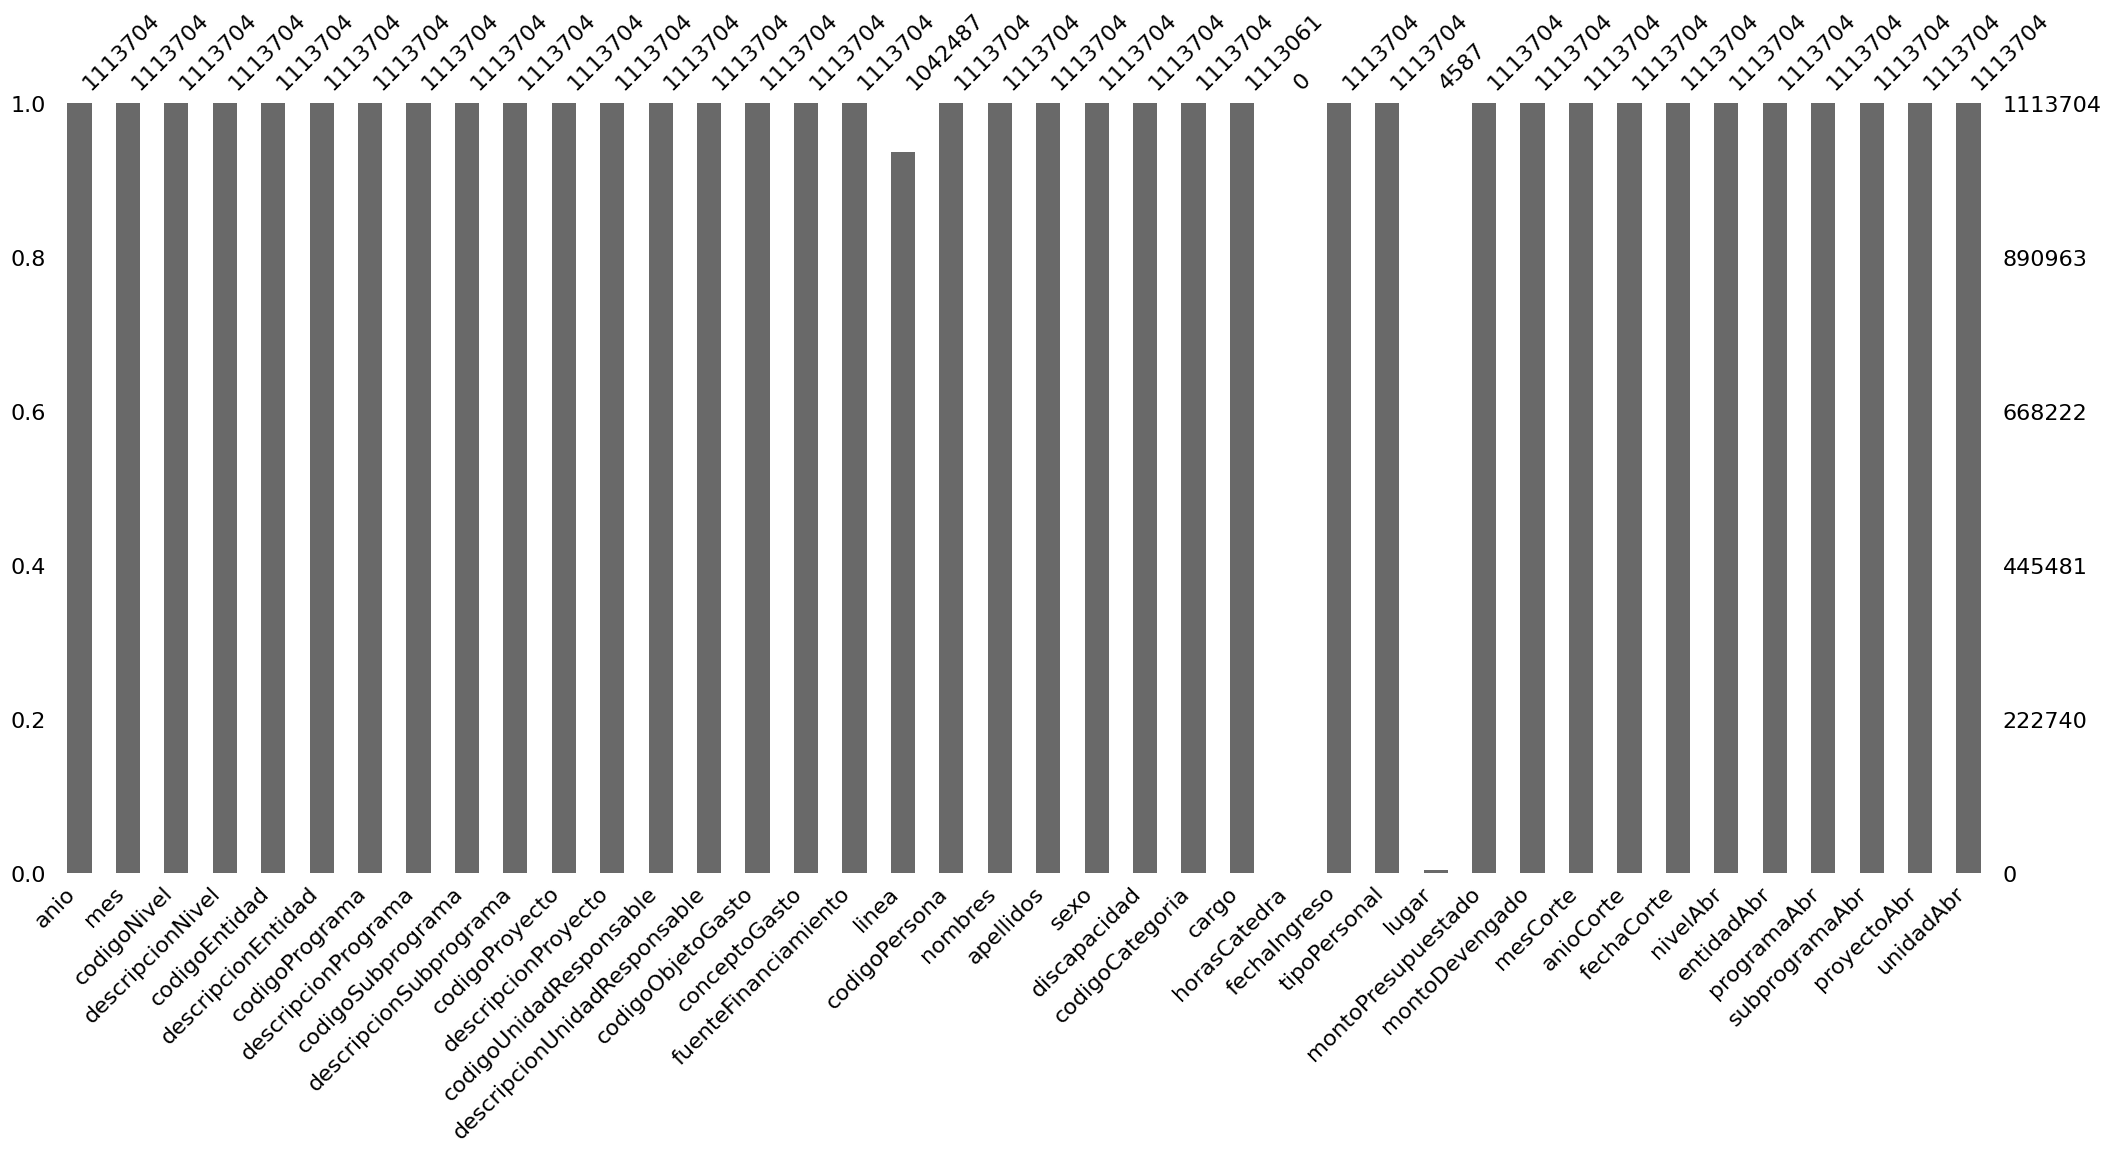

In [101]:
msno.bar(df_nomina_funcionario)

Muestro una matrix de valores faltantes por variable

*Entrada: dataframe que contiene todas las variables*

*Salida: matrix que contiene las variables y las secciones/filas en las cuales hay valores faltantes (las que no estan rellenas con un color)*

*   [matrix](https://github.com/ResidentMario/missingno#matrix)

<Axes: >

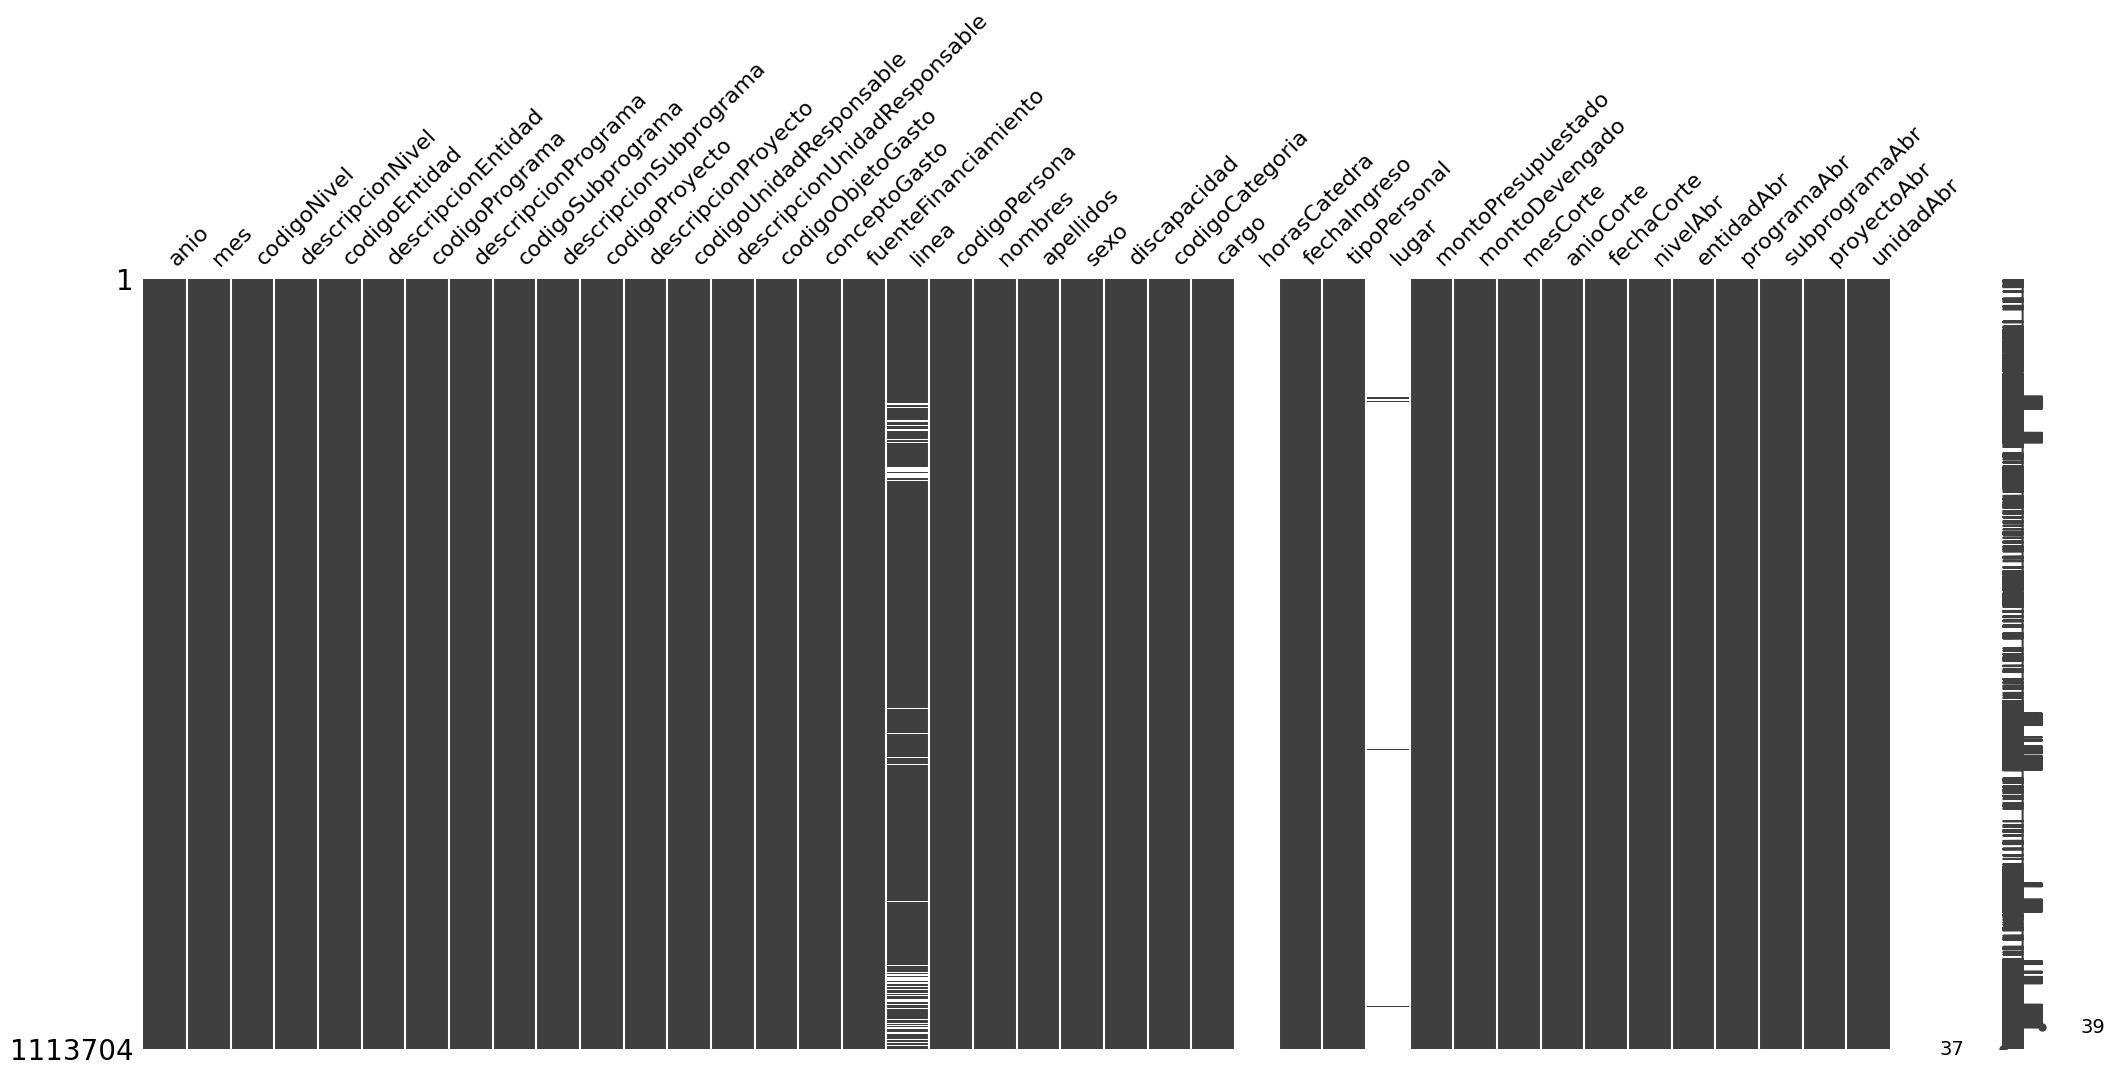

In [102]:
msno.matrix(df_nomina_funcionario)

Muestro un Mapa de calor de las variables con valores faltantes

*Entrada: dataframe que contiene todas las variables*

*Salida: mapa de calor que muestra las correlaciones entre las variables con valores faltantes*

*   [heatmap](https://github.com/ResidentMario/missingno#heatmap)

<Axes: >

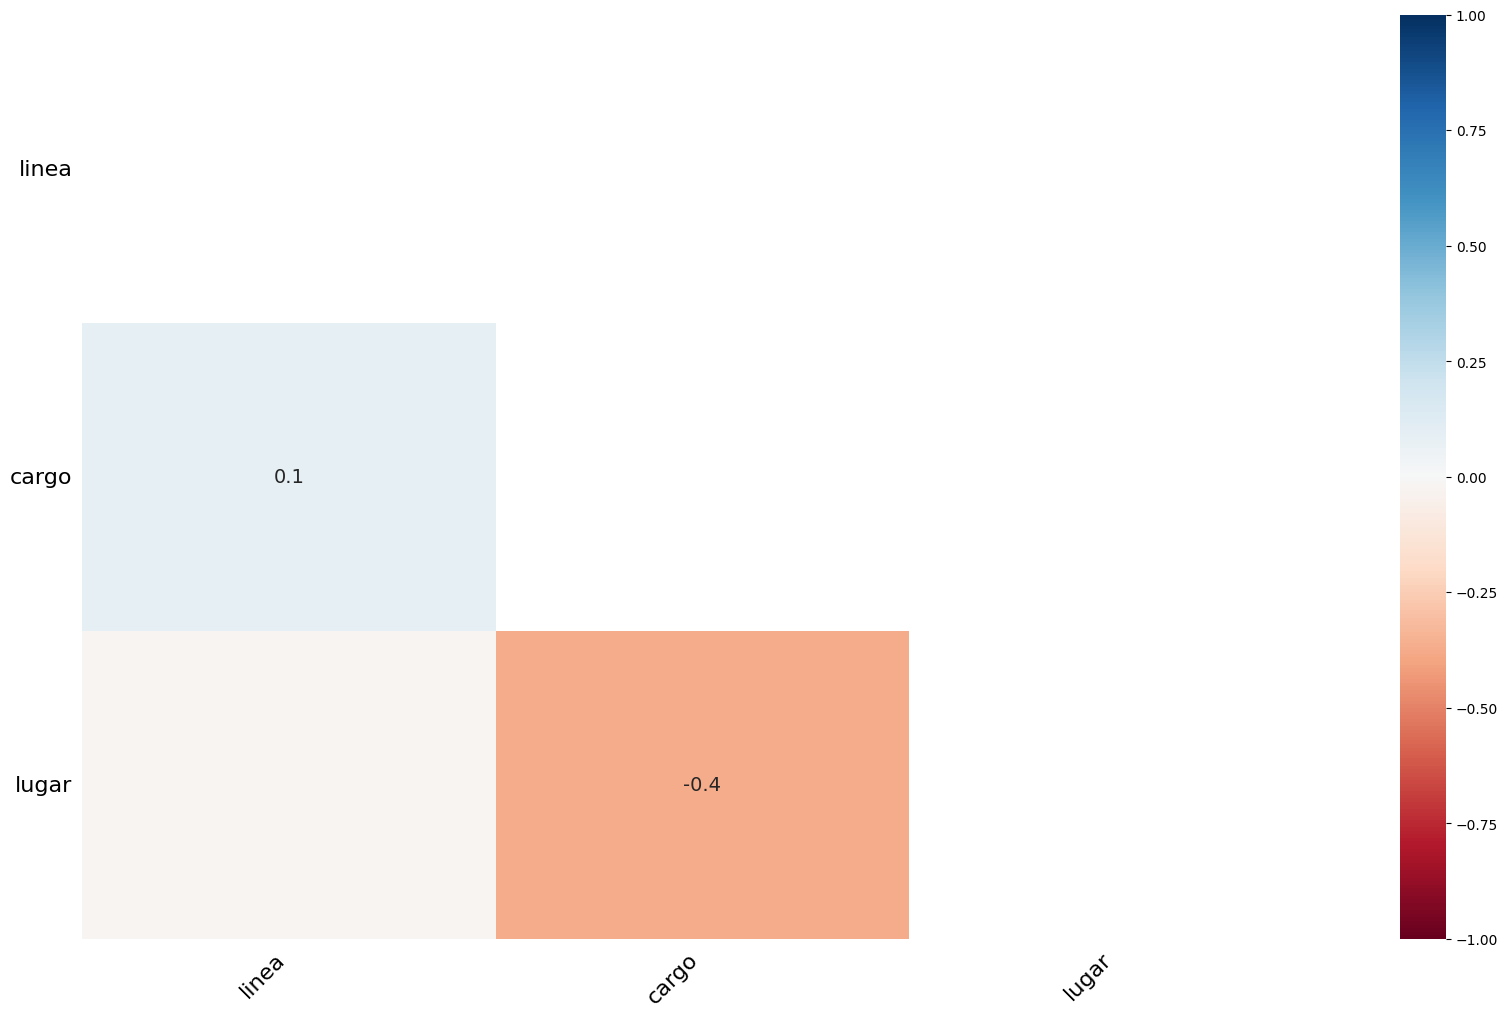

In [103]:
msno.heatmap(df_nomina_funcionario)

## 1.4 Estadistica descriptiva

Mostramos un resumen que contiene las estadisticas descriptivas de las variables numericas

*Entrada: dataframe que contiene las variables numericas a las cuales queremos aplicar las estadisticas descriptivas.*

*Salida: dataframe con las estadisticas descritivas en base al Dataframe de entrada*

*   [describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
*   [t](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.T.html)


In [104]:
df_nomina_funcionario.describe().T

,count,mean,std,min,25%,50%,75%,max
anio,1113704.0,2.023000e+03,0.000000e+00,2023.0,2023.0,2023.0,2023.0,2023.0
mes,1113704.0,7.000000e+00,0.000000e+00,7.0,7.0,7.0,7.0,7.0
codigoNivel,1113704.0,1.304543e+01,3.807586e+00,11.0,12.0,12.0,12.0,28.0
codigoEntidad,1113704.0,6.345312e+00,3.320320e+00,1.0,5.0,7.0,7.0,39.0
codigoPrograma,1113704.0,1.083616e+00,3.650558e-01,1.0,1.0,1.0,1.0,7.0
codigoSubprograma,1113704.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
codigoProyecto,1113704.0,6.509411e+00,1.058772e+01,1.0,2.0,3.0,4.0,66.0
codigoUnidadResponsable,1113704.0,3.344455e+01,5.459453e+01,1.0,4.0,25.0,43.0,414.0
codigoObjetoGasto,1113704.0,1.278679e+02,3.521022e+01,111.0,111.0,111.0,133.0,849.0
linea,1042487.0,2.570436e+02,4.396271e+02,1.0,54.0,121.0,362.0,4900.0


Mostramos un resumen que contiene las estadisticas descriptivas de las variables no numericas

*Entrada: dataframe que contiene las variables no numericas a las cuales queremos aplicar las estadisticas descriptivas. Se debe especificar el tipo de dato de las variables no numericas a las cuales hay que aplicar el calculo de las estadisticas*

*Salida: dataframe con las estadisticas descritivas en base al Dataframe de entrada*

*   [describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
*   [t](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.T.html)


In [105]:
df_nomina_funcionario.describe(include=[object]).T

,count,unique,top,freq
descripcionNivel,1113704,7,12-PODER EJECUTIVO,984836
descripcionEntidad,1113704,70,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,606176
descripcionPrograma,1113704,24,001 - PROGRAMA CENTRAL,1024288
descripcionSubprograma,1113704,1,0 - *,1113704
descripcionProyecto,1113704,465,004-BRINDAR SERVICIO EDUCATIVO EN EL TERCER CI...,233705
descripcionUnidadResponsable,1113704,266,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,455573
conceptoGasto,1113704,34,111-SUELDOS,632202
fuenteFinanciamiento,1113704,3,10-RECURSOS DEL TESORO,1079965
codigoPersona,1113704,268498,2454169,63
nombres,1113704,82676,JULIO CESAR,5187


Los resultado del analisis detallado de estas dos estadisticas descriptivas se observan en los puntos 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 1.10 y 1.11

## 1.5 Constantes


Graficamos las variables que son constantes en el Dataset.

*Entrada: titulo de cada sub-grafico y la columna del dataframe a utilizarce como fuente para dibugar el sub-grafico.*

*Salida: grupo de diagramas de barra ó histogramas*

*   [subplots](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html)
*   [hist](https://matplotlib.org/stable/gallery/statistics/hist.html#)
*   [bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)
*   [value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

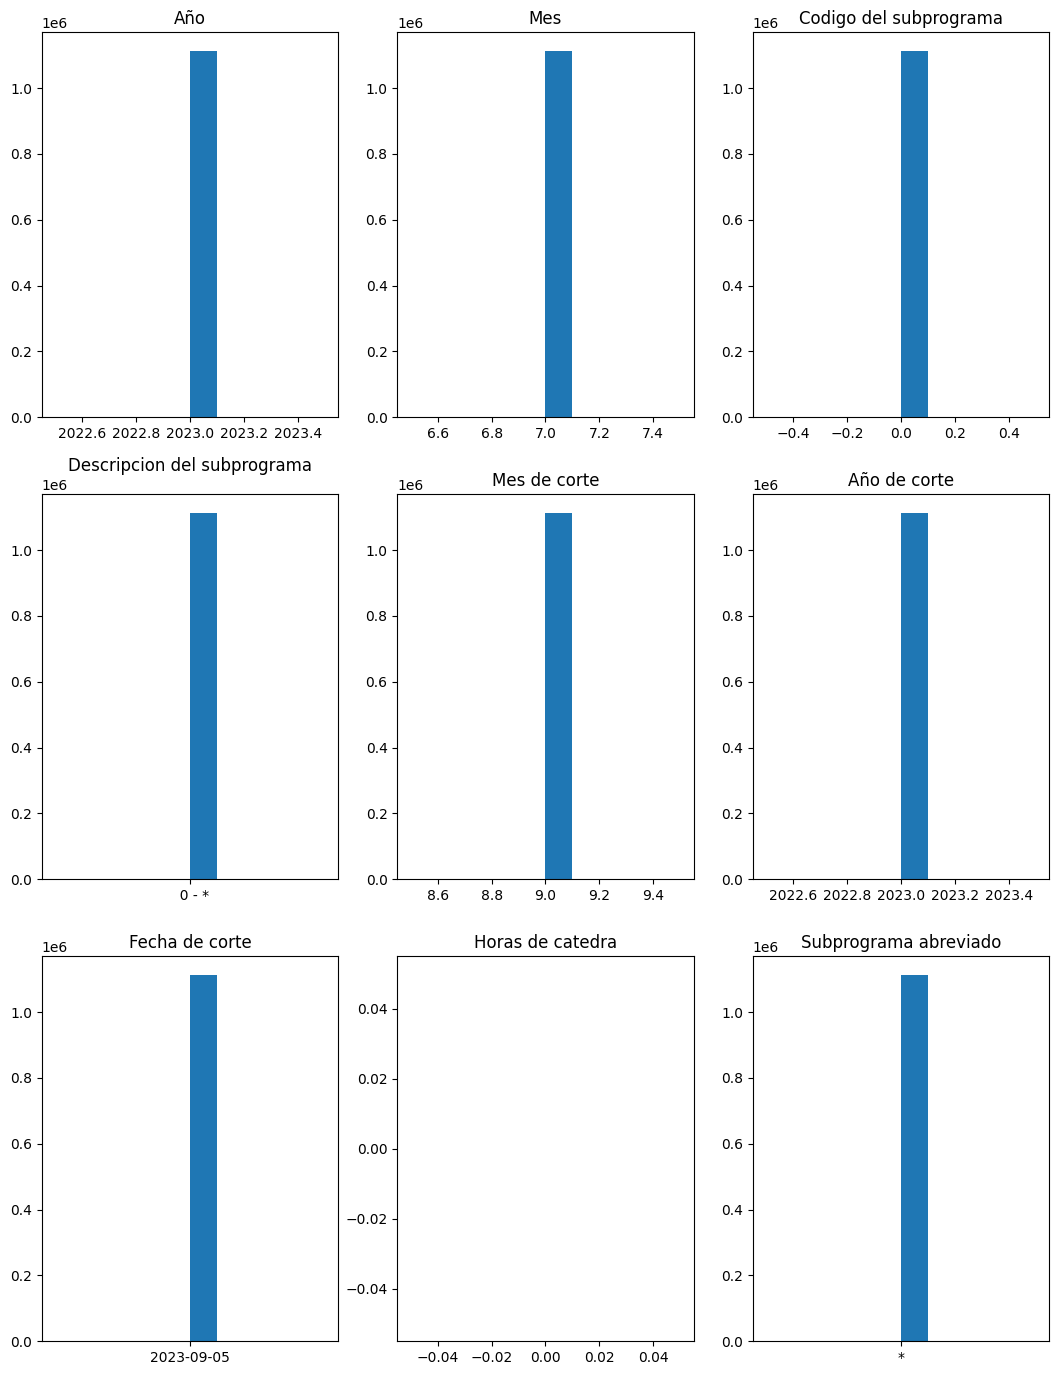

In [106]:
fig, axs = plt.subplots(3, 3, figsize=(13, 17))

axs[0, 0].set_title('Año')
axs[0, 0].hist(df_nomina_funcionario["anio"])

axs[0, 1].set_title('Mes')
axs[0, 1].hist(df_nomina_funcionario["mes"])

axs[0, 2].set_title('Codigo del subprograma')
axs[0, 2].hist(df_nomina_funcionario["codigoSubprograma"])

axs[1, 0].set_title('Descripcion del subprograma')
axs[1, 0].hist(df_nomina_funcionario["descripcionSubprograma"])

axs[1, 1].set_title('Mes de corte')
axs[1, 1].hist(df_nomina_funcionario["mesCorte"])

axs[1, 2].set_title('Año de corte')
axs[1, 2].hist(df_nomina_funcionario["anioCorte"])

axs[2, 0].set_title('Fecha de corte')
axs[2, 0].hist(df_nomina_funcionario["fechaCorte"])

axs[2, 1].set_title('Horas de catedra')
axs[2, 1].bar(df_nomina_funcionario["horasCatedra"].value_counts(), height= 0.8)

axs[2, 2].set_title('Subprograma abreviado')
axs[2, 2].hist(df_nomina_funcionario["subprogramaAbr"])

plt.show()

Guardo el listado de variables que son constantes.

*Entrada: nombre de las constantes.*

*Salida: listado de constantes.*

*   [list](https://docs.python.org/3/library/functions.html#func-list)

In [107]:
list_var_constantes = ["anio", "mes", "codigoSubprograma", "descripcionSubprograma", "mesCorte", "anioCorte", "fechaCorte", "horasCatedra", "subprogramaAbr"]
list_var_constantes

['anio',
 'mes',
 'codigoSubprograma',
 'descripcionSubprograma',
 'mesCorte',
 'anioCorte',
 'fechaCorte',
 'horasCatedra',
 'subprogramaAbr']

## 1.6 Alta cardinalidad

Mostramos los valores unicos que contienen las variables con alta cardinalidad en el Dataset

*Entrada: array de numpy que contiene los valores unicos de las columnas con alta cardinalidad*

*Salida: mensaje que indica el nombre de la columna y la cantidad de valores unicos que contiene la misma*

*   [Unique](https://pandas.pydata.org/docs/reference/api/pandas.unique.html)
*   [Len](https://docs.python.org/3/library/functions.html#len)
*   [Print](https://docs.python.org/3/library/functions.html#print)

In [108]:
valores_unicos = len(df_nomina_funcionario["codigoPersona"].unique())
print(f"La variable codigo de persona tiene {valores_unicos:,} valores unicos")

valores_unicos = len(df_nomina_funcionario["apellidos"].unique())
print(f"La variable apellidos tiene {valores_unicos:,} valores unicos")

valores_unicos = len(df_nomina_funcionario["nombres"].unique())
print(f"La variable nombres tiene {valores_unicos:,} valores unicos")

valores_unicos = len(df_nomina_funcionario["fechaIngreso"].unique())
print(f"La variable fecha de ingreso tiene {valores_unicos:,} valores unicos")

valores_unicos = len(df_nomina_funcionario["cargo"].unique())
print(f"La variable cargo tiene {valores_unicos:,} valores unicos")

valores_unicos = len(df_nomina_funcionario["codigoCategoria"].unique())
print(f"La variable codigo categoria tiene {valores_unicos:,} valores unicos")

valores_unicos = len(df_nomina_funcionario["lugar"].unique())
print(f"La variable lugar tiene {valores_unicos:,} valores unicos")

La variable codigo de persona tiene 268,498 valores unicos
La variable apellidos tiene 107,156 valores unicos
La variable nombres tiene 82,676 valores unicos
La variable fecha de ingreso tiene 7,250 valores unicos
La variable cargo tiene 2,383 valores unicos
La variable codigo categoria tiene 1,963 valores unicos
La variable lugar tiene 75 valores unicos


Guardo el listado de variables que tienen alta cardinalidad

*Entrada: nombre de las variables que tienen alta cardinalidad.*

*Salida: listado de variables que tienen alta cardinalidad.*

*   [list](https://docs.python.org/3/library/functions.html#func-list)

In [109]:
list_var_alta_cardinalidad = ["codigoPersona", "apellidos", "nombres", "fechaIngreso", "cargo", "codigoCategoria", "lugar"]
list_var_alta_cardinalidad

['codigoPersona',
 'apellidos',
 'nombres',
 'fechaIngreso',
 'cargo',
 'codigoCategoria',
 'lugar']

Guardo el listado de variables que tienen alta cardinalidad y que seran excluidas de analisis posteriores.

*Entrada: nombre de las variables que tienen alta cardinalidad a excluirse.*

*Salida: listado de variables excluidas que tienen alta cardinalidad.*

*   [list](https://docs.python.org/3/library/functions.html#func-list)

In [110]:
list_var_alta_cardinalidad_a_excluir = ["codigoPersona", "apellidos", "nombres"]

## 1.7 Variables redundantes **

Mostramos las variables que son redundantes en el Dataset.

Entrada: Se unen tres Dataframe que contiene cada uno un resumen de las cantidades agrupadas por valores. Se usa la cantidad como clave para realizar el join.

Salida: Mensaje que indica las variables con sus valores unicos y una tabla de equivalencia entre las variables.

Enlaces:

*   [Unique](https://pandas.pydata.org/docs/reference/api/pandas.unique.html)
*   [Len](https://docs.python.org/3/library/functions.html#len)
*   [Print](https://docs.python.org/3/library/functions.html#print)
*   [Value counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)
*   [Reset index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)
*   [Join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html)
*   [Drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)






In [111]:
valores_unicos = len(df_nomina_funcionario["codigoNivel"].unique())
print(f"La variable codigo de nivel tiene {valores_unicos:,} valores unicos")

valores_unicos = len(df_nomina_funcionario["descripcionNivel"].unique())
print(f"La variable descripcion del nivel tiene {valores_unicos:,} valores unicos")

valores_unicos = len(df_nomina_funcionario["nivelAbr"].unique())
print(f"La variable nivel arbeviado tiene {valores_unicos:,} valores unicos")

df_cant = pd.DataFrame({"Cantidad": df_nomina_funcionario["codigoNivel"].value_counts()}).reset_index(names=['CodigoNivel'])
df_desc = pd.DataFrame({"Cantidad": df_nomina_funcionario["descripcionNivel"].value_counts()}).reset_index(names=['DescripcionNivel'])
df_abr = pd.DataFrame({"Cantidad": df_nomina_funcionario["nivelAbr"].value_counts()}).reset_index(names=['NivelAbreviado'])
df_var_redundantes = df_cant.join(df_desc, rsuffix='_other').drop(columns=['Cantidad_other']).join(df_abr, rsuffix='_other').drop(columns=['Cantidad_other'])

df_var_redundantes[["Cantidad", "CodigoNivel", "DescripcionNivel", "NivelAbreviado"]]

La variable codigo de nivel tiene 7 valores unicos
La variable descripcion del nivel tiene 7 valores unicos
La variable nivel arbeviado tiene 7 valores unicos


,Cantidad,CodigoNivel,DescripcionNivel,NivelAbreviado
0,984836,12,12-PODER EJECUTIVO,PODER EJECUTIVO
1,62731,28,28-UNIVERSIDADES NACIONALES,UNIVERSIDADES NAC.
2,47464,13,13-PODER JUDICIAL Y ORGANISMOS AUXILIARES DE J...,P.JUD. ORG.AUX. JUST
3,10230,23,23-ENTES AUTÓNOMOS Y AUTÁRQUICOS,ENTES AUTÓN.Y AUTÁRQ
4,5544,11,11-PODER LEGISLATIVO,PODER LEGISLATIVO
5,2546,14,14-CONTRALORÍA GENERAL DE LA REPÚBLICA,CONTRALORÍA
6,353,15,15-OTROS ORGANISMOS DEL ESTADO,OEE


**Observacion 1.7.1**

> Las variables CodigoNivel, DescripcionNivel	y NivelAbreviado aportan la misma información pero usando diferentes tipos de datos. Variable seleccionada: CodigoNivel






In [112]:
valores_unicos = len(df_nomina_funcionario["codigoEntidad"].unique())
print(f"La variable codigo de entidad tiene {valores_unicos:,} valores unicos")

valores_unicos = len(df_nomina_funcionario["descripcionEntidad"].unique())
print(f"La variable descripcion de entidad tiene {valores_unicos:,} valores unicos")

valores_unicos = len(df_nomina_funcionario["entidadAbr"].unique())
print(f"La variable entidad arbeviada tiene {valores_unicos:,} valores unicos")

La variable codigo de entidad tiene 36 valores unicos
La variable descripcion de entidad tiene 70 valores unicos
La variable entidad arbeviada tiene 70 valores unicos


In [113]:
df_cant = pd.DataFrame({"Cantidad": df_nomina_funcionario["codigoEntidad"].value_counts()}).reset_index(names=['CodigoEntidad'])
df_cant

,CodigoEntidad,Cantidad
0,7,608930
1,3,130250
2,8,121431
3,5,96691
4,1,71359
5,2,18743
6,6,16217
7,9,8678
8,4,6301
9,13,6046


In [114]:
df_desc = pd.DataFrame({"Cantidad": df_nomina_funcionario["descripcionEntidad"].value_counts()}).reset_index(names=['DescripcionEntidad'])
df_abr = pd.DataFrame({"Cantidad": df_nomina_funcionario["entidadAbr"].value_counts()}).reset_index(names=['EntidadAbreviada'])
df_var_redundantes = df_desc.join(df_abr, rsuffix='_other').drop(columns=['Cantidad_other'])
df_var_redundantes[["Cantidad", "DescripcionEntidad", "EntidadAbreviada"]]

,Cantidad,DescripcionEntidad,EntidadAbreviada
0,606176,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,MEC
1,120275,008-MINISTERIO DE SALUD PÚBLICA Y BIENESTAR SO...,MSPYBS
2,108435,003-MINISTERIO DEL INTERIOR,MI
3,94366,005-MINISTERIO DE DEFENSA NACIONAL,MDN
4,44012,001-UNIVERSIDAD NACIONAL DE ASUNCIÓN,UNA
...,...,...,...
65,64,029-CONSEJO NACIONAL DE EDUCACIÓN SUPERIOR,CONES
66,54,013-ENTE REGULADOR DE SERVICIOS SANITARIOS,ERSSAN
67,44,"035-DIRECCIÓN NACIONAL DE DEFENSA, SALUD Y BIE...",DNDSYA
68,20,037-INSTITUTO NACIONAL DEL AUDIOVISUAL PARAGUAYO,INAP


**Observacion 1.7.2**

> La variable CodigoEntidad esta mas acotada que las otras dos (DescripcionEntidad, EntidadAbreviada). Es un punto a consultar a Hacienda ya que se esperaba que tanto el codigo, descripcion y entidad abreviada tengan las mismas cantidades de valores únicos.





**Observacion 1.7.3**

> Las variables DescripcionEntidad y EntidadAbreviada aportan la misma información pero usando diferentes tipos de datos. Variable seleccionada: DescripcionEntidad.


In [115]:
valores_unicos = len(df_nomina_funcionario["codigoPrograma"].unique())
print(f"La variable codigo de programa tiene {valores_unicos:,} valores unicos")

valores_unicos = len(df_nomina_funcionario["descripcionPrograma"].unique())
print(f"La variable descripcion del programa tiene {valores_unicos:,} valores unicos")

valores_unicos = len(df_nomina_funcionario["programaAbr"].unique())
print(f"La variable programa arbeviado tiene {valores_unicos:,} valores unicos")

La variable codigo de programa tiene 7 valores unicos
La variable descripcion del programa tiene 24 valores unicos
La variable programa arbeviado tiene 37 valores unicos


In [116]:
df_cant = pd.DataFrame({"Cantidad": df_nomina_funcionario["codigoPrograma"].value_counts()}).reset_index(names=['CodigoPrograma'])
df_cant.sort_values(by=['CodigoPrograma'])

,CodigoPrograma,Cantidad
0,1,1033749
1,2,75038
2,3,2324
6,4,206
5,5,309
4,6,885
3,7,1193


In [117]:
df_desc = pd.DataFrame({"Cantidad": df_nomina_funcionario["descripcionPrograma"].value_counts()}).reset_index(names=['DescripcionPrograma'])
df_desc["codigo_extraido"] = df_desc['DescripcionPrograma'].str.split("-").str[0].astype("int64")
df_desc.sort_values(by=['codigo_extraido'])

,DescripcionPrograma,Cantidad,codigo_extraido
0,001 - PROGRAMA CENTRAL,1024288,1
21,001 - RED VIAL PAVIMENTADA INCREMENTADA,24,1
18,001 - MEJORA DE PRODUCTIVIDAD DE SISTEMAS DE P...,72,1
16,001 - PROTECCIÓN DE LA NIÑEZ Y ADOLESCENCIA,142,1
12,001 - ADMINISTRACION GENERAL,678,1
10,001 - SOLUCIONES HABITACIONALES ADECUADAS,764,1
9,001 - CONTROL MIGRATORIO EN EL TERRITORIO NACI...,823,1
11,001 - MEJORA DE LA FORMACION Y CAPACITACION LA...,762,1
3,001 - ACCESO A LA ATENCIÓN PRIMARIA DE LA SALUD,5270,1
7,001 - PROTECCION SOCIAL A FAMILIAS EN SITUACIO...,926,1


https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

In [118]:

df_desc.groupby("codigo_extraido").agg({"Cantidad": "sum"})

,Cantidad
codigo_extraido,
1,1033749
2,75038
3,2324
4,206
5,309
6,885
7,1193


In [119]:
df_abr = pd.DataFrame({"Cantidad": df_nomina_funcionario["programaAbr"].value_counts()}).reset_index(names=['ProgramaAbreviado'])

df_abr

,ProgramaAbreviado,Cantidad
0,PC,937028
1,SHRM,63121
2,PCSS,47125
3,AC,11626
4,EDLTJ,8486
5,AAP,5270
6,CENTRAL,5148
7,PROG. CTRAL.,3495
8,P.C.,3242
9,SNPP,3234


**Observacion 1.7.4**

> Las variables CodigoPrograma, DescripcionPrograma y ProgramaAbreviado no coinciden en la cantidad de valores unicos.  No obstante se visualiza un patron de codigo en la variable de DescripcionPrograma, el cual agrupamos por este codigo extraido y como resultado tenemos coincidencia de cantidad de valores unicos entre las variables CodigoPrograma y DescripcionPrograma. Para la variable ProgramaAbreviado no encontramos un patron.


**Observacion 1.7.5**

> Las variable DescripcionPrograma aparentemente aporta mas información detallada sobre los programas. Variable seleccionada: DescripcionPrograma.

In [120]:
valores_unicos = len(df_nomina_funcionario["codigoProyecto"].unique())
print(f"La variable codigo de proyecto tiene {valores_unicos:,} valores unicos")

valores_unicos = len(df_nomina_funcionario["descripcionProyecto"].unique())
print(f"La variable descripcion del proyecto tiene {valores_unicos:,} valores unicos")

valores_unicos = len(df_nomina_funcionario["proyectoAbr"].unique())
print(f"La variable proyecto arbeviado tiene {valores_unicos:,} valores unicos")

La variable codigo de proyecto tiene 65 valores unicos
La variable descripcion del proyecto tiene 465 valores unicos
La variable proyecto arbeviado tiene 381 valores unicos


In [121]:
df_cant = pd.DataFrame({"Cantidad": df_nomina_funcionario["codigoProyecto"].value_counts()}).reset_index(names=['CodigoProyecto'])
df_cant.sort_values(by=['CodigoProyecto'])

,CodigoProyecto,Cantidad
0,1,254716
3,2,135397
2,3,236815
1,4,247612
7,5,13836
...,...,...
12,62,9457
64,63,4
56,64,79
47,65,511


In [122]:

df_desc = pd.DataFrame({"Cantidad": df_nomina_funcionario["descripcionProyecto"].value_counts()}).reset_index(names=['DescripcionProyecto'])
df_desc["codigo_extraido"] = df_desc['DescripcionProyecto'].str.split("-").str[0].astype("int64")
df_desc.sort_values(by=['codigo_extraido'])

,DescripcionProyecto,Cantidad,codigo_extraido
57,001-GESTIONES ADMINISTRATIVAS Y FINANCIERAS,1639,1
228,"001-OBTENCIÓN, PRODUCCIÓN Y SUMINISTROS DE SANGRE",195,1
39,001-GESTION GERENCIAL,2115,1
40,001-GESTION ADMINISTRATIVA DEL MH,2095,1
41,001-GESTION ADMINISTRATIVA,2071,1
...,...,...,...
12,062-APOYO LOGISTICO AL PERSONAL DE LAS FUERZAS...,9457,62
439,063-PRESERVACION DEL MEDIO AMBIENTE,4,63
292,064-ADMINISTRACION FINANCIERA DE LAS FFAANN,79,64
135,065-CONDUCCIÓN OPERATIVA DEL MDN,511,65


In [123]:
df_desc.groupby("codigo_extraido").agg({"Cantidad": "sum"})

,Cantidad
codigo_extraido,
1,254716
2,135397
3,236815
4,247612
5,13836
...,...
62,9457
63,4
64,79


In [124]:
df_abr = pd.DataFrame({"Cantidad": df_nomina_funcionario["proyectoAbr"].value_counts()}).reset_index(names=['ProyectoAbreviado'])
df_abr

,ProyectoAbreviado,Cantidad
0,BSETCEEBYEM,233705
1,BSEPSCEEB,207290
2,AG,141697
3,GRPN,103163
4,**,60574
...,...,...
376,GNI,2
377,FTSF,1
378,MACSL,1
379,COMAVAN,1


**Observacion 1.7.6**

> Las variables CodigoProyecto, DescripcionProyecto y ProyectoAbreviado no coinciden en la cantidad de valores unicos.  No obstante se visualiza un patron de codigo en la variable de DescripcionProyecto, el cual agrupamos por este codigo extraido y como resultado tenemos coincidencia de cantidad de valores unicos entre las variables CodigoProyecto y DescripcionProyecto. Para la variable ProyectoAbreviado no encontramos un patron.

**Observacion 1.7.7**

> Las variable DescripcionProyecto aparentemente aporta mas información detallada sobre los programas. Variable seleccionada: DescripcionProyecto.

In [125]:
valores_unicos = len(df_nomina_funcionario["codigoUnidadResponsable"].unique())
print(f"La variable codigo de unidad responsable tiene {valores_unicos:,} valores unicos")

valores_unicos = len(df_nomina_funcionario["descripcionUnidadResponsable"].unique())
print(f"La variable descripcion de unidad responsable tiene {valores_unicos:,} valores unicos")

valores_unicos = len(df_nomina_funcionario["unidadAbr"].unique())
print(f"La variable unidad arbeviada tiene {valores_unicos:,} valores unicos")

La variable codigo de unidad responsable tiene 96 valores unicos
La variable descripcion de unidad responsable tiene 266 valores unicos
La variable unidad arbeviada tiene 260 valores unicos


In [126]:
df_cant = pd.DataFrame({"Cantidad": df_nomina_funcionario["codigoUnidadResponsable"].value_counts()}).reset_index(names=['CodigoUnidadResponsable'])
df_cant.sort_values(by=['CodigoUnidadResponsable'])

,CodigoUnidadResponsable,Cantidad
3,1,101657
7,2,23365
6,3,24146
1,4,148499
17,5,5099
...,...,...
58,409,52
79,410,10
75,411,12
70,412,13


In [127]:
df_desc = pd.DataFrame({"Cantidad": df_nomina_funcionario["descripcionUnidadResponsable"].value_counts()}).reset_index(names=['DescripcionUnidadResponsable'])
df_desc["codigo_extraido"] = df_desc['DescripcionUnidadResponsable'].str.split("-").str[0].astype("int64")
df_desc.sort_values(by=['codigo_extraido'])

,DescripcionUnidadResponsable,Cantidad,codigo_extraido
101,1-GABINETE CIVIL,618,1
162,1-AGENCIA NACIONAL DE TRANSITO Y SEGURIDAD VIAL,191,1
159,1-PRESIDENCIA DEL IPA,207,1
34,1-MINISTERIO DE DESARROLLO SOCIAL,2332,1
152,1-DIRECCION GRAL. DE ADM. Y FINANZAS,243,1
...,...,...,...
209,409-COMANDO DE CUERPOS DE EJERCITO,52,409
245,410-ESCUELA DE INFANTERIA,10,410
239,411-ESCUELA DE INTELIGENCIA MILITAR DEL EJERCITO,12,411
238,412-BATALLON DE INTELIGENCIA MILITAR,13,412


In [128]:
df_desc.groupby("codigo_extraido").agg({"Cantidad": "sum"})

,Cantidad
codigo_extraido,
1,101657
2,23365
3,24146
4,148499
5,5099
...,...
409,52
410,10
411,12


In [129]:
df_abr = pd.DataFrame({"Cantidad": df_nomina_funcionario["unidadAbr"].value_counts()}).reset_index(names=['UnidadAbreviada'])
df_abr

,UnidadAbreviada,Cantidad
0,VEPAGE,455573
1,DGA,141719
2,UAF2 CPN,107696
3,DAF-FFTT,48688
4,GAMIN,47890
...,...,...
255,COMCIMEFOR,2
256,TROESEJ,2
257,EEF-FFAA,2
258,CNRARP,2


**Observacion 1.7.8**

> Las variables CodigoUnidadResponsable, DescripcionUnidadResponsable y UnidadAbreviada no coinciden en la cantidad de valores unicos.  No obstante se visualiza un patron de codigo en la variable de DescripcionUnidadResponsable, el cual agrupamos por este codigo extraido y como resultado tenemos coincidencia de cantidad de valores unicos entre las variables CodigoUnidadResponsable y DescripcionUnidadResponsable. Para la variable UnidadAbreviada no encontramos un patron.

**Observacion 1.7.9**

> Las variable DescripcionUnidadResponsable aparentemente aporta mas información detallada sobre los programas. Variable seleccionada: DescripcionUnidadResponsable.

In [130]:
valores_unicos = len(df_nomina_funcionario["codigoObjetoGasto"].unique())
print(f"La variable codigo de objeto de gasto tiene {valores_unicos:,} valores unicos")

valores_unicos = len(df_nomina_funcionario["conceptoGasto"].unique())
print(f"La variable concepto de gasto tiene {valores_unicos:,} valores unicos")

La variable codigo de objeto de gasto tiene 34 valores unicos
La variable concepto de gasto tiene 34 valores unicos


In [131]:
df_cant = pd.DataFrame({"Cantidad": df_nomina_funcionario["codigoObjetoGasto"].value_counts()}).reset_index(names=['CodigoObjetoGasto'])
df_desc = pd.DataFrame({"Cantidad": df_nomina_funcionario["conceptoGasto"].value_counts()}).reset_index(names=['ConceptoGasto'])
df_var_redundantes = df_cant.join(df_desc, rsuffix='_other').drop(columns=['Cantidad_other'])

df_var_redundantes[["Cantidad", "CodigoObjetoGasto", "ConceptoGasto"]]

,Cantidad,CodigoObjetoGasto,ConceptoGasto
0,632202,111,111-SUELDOS
1,83450,132,132-ESCALAFÓN DOCENTE
2,62262,133,133-BONIFICACIONES
3,46271,191,191-SUBSIDIO PARA LA SALUD
4,44863,131,131-SUBSIDIO FAMILIAR
5,43459,136,136-BONIFICACIÓN POR EXPOSICIÓN AL PELIGRO
6,41471,138,138-UNIDAD BÁSICA ALIMENTARIA - UBA
7,35802,142,142-CONTRATACIÓN DE PERSONAL DE SALUD
8,31547,195,195-BONIFICACION FAMILIAR PARA LOS EFECTIVOS D...
9,21328,144,144-JORNALES


**Observacion 1.7.10**

> Las variables CodigoObjetoGasto y	ConceptoGasto aportan la misma información pero usando diferentes tipos de datos. Variable seleccionada: CodigoObjetoGasto

## 1.8 Variables numéricas **

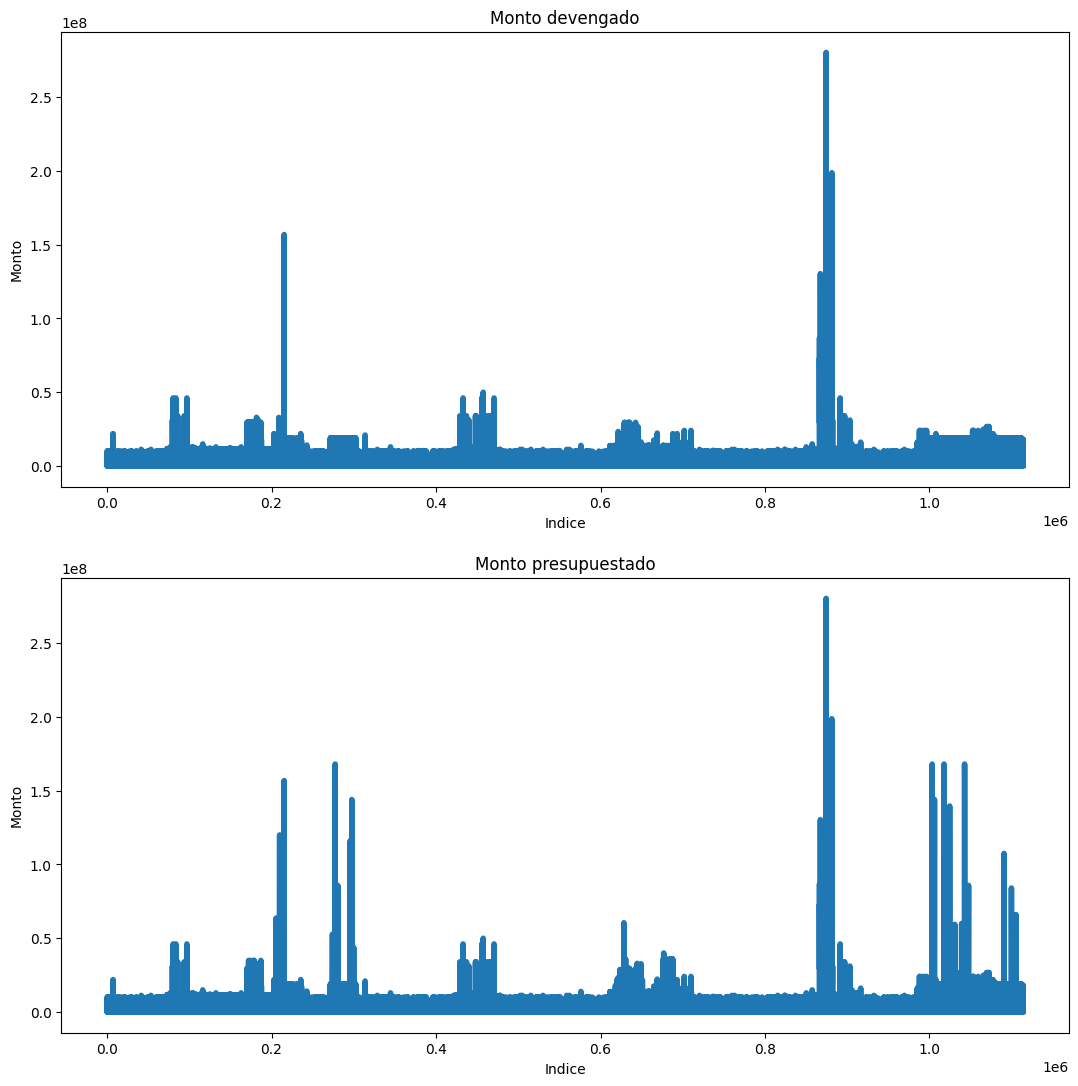

In [132]:
fig, axs = plt.subplots(2, figsize=(13, 13))

axs[0].set_title('Monto devengado')
axs[0].plot(df_nomina_funcionario.index, df_nomina_funcionario["montoDevengado"], linewidth = 4)
axs[0].set_xlabel("Indice")
axs[0].set_ylabel("Monto")

axs[1].set_title('Monto presupuestado')
axs[1].plot(df_nomina_funcionario.index, df_nomina_funcionario["montoPresupuestado"], linewidth = 4)
axs[1].set_xlabel("Indice")
axs[1].set_ylabel("Monto")

plt.show()


<ipython-input-133-afebc400f080>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
<ipython-input-133-afebc400f080>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)


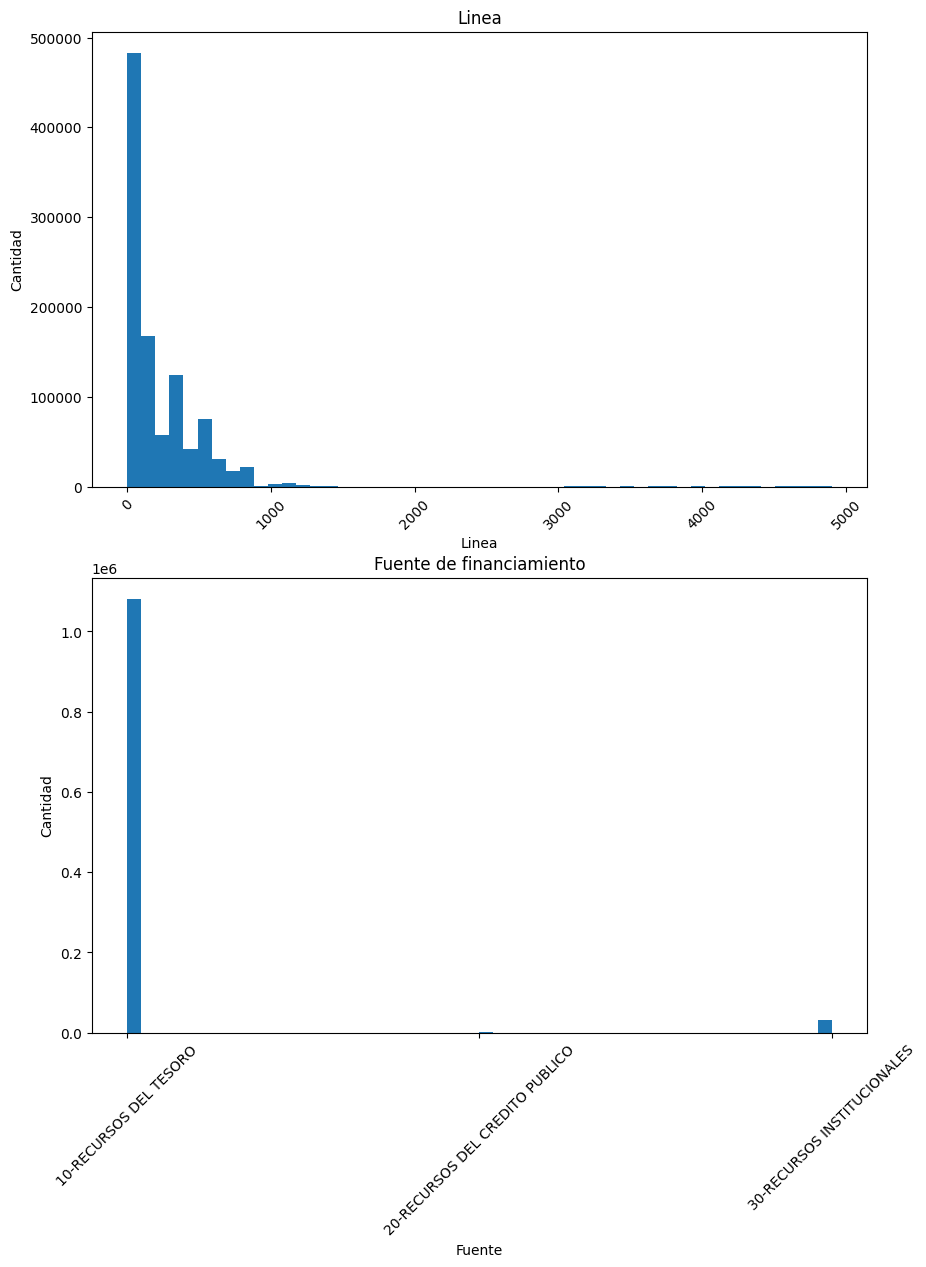

In [133]:
fig, axs = plt.subplots(2, figsize=(10, 13))

axs[0].set_title('Linea')
axs[0].hist(df_nomina_funcionario["linea"], bins=50)
axs[0].set_xlabel("Linea")
axs[0].set_ylabel("Cantidad")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)

axs[1].set_title('Fuente de financiamiento')
axs[1].hist(df_nomina_funcionario["fuenteFinanciamiento"], bins=50)
axs[1].set_xlabel("Fuente")
axs[1].set_ylabel("Cantidad")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)

plt.show()

<ipython-input-134-fae4bf6bc42c>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels())
<ipython-input-134-fae4bf6bc42c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels())
<ipython-input-134-fae4bf6bc42c>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(axs[2].get_xticklabels())


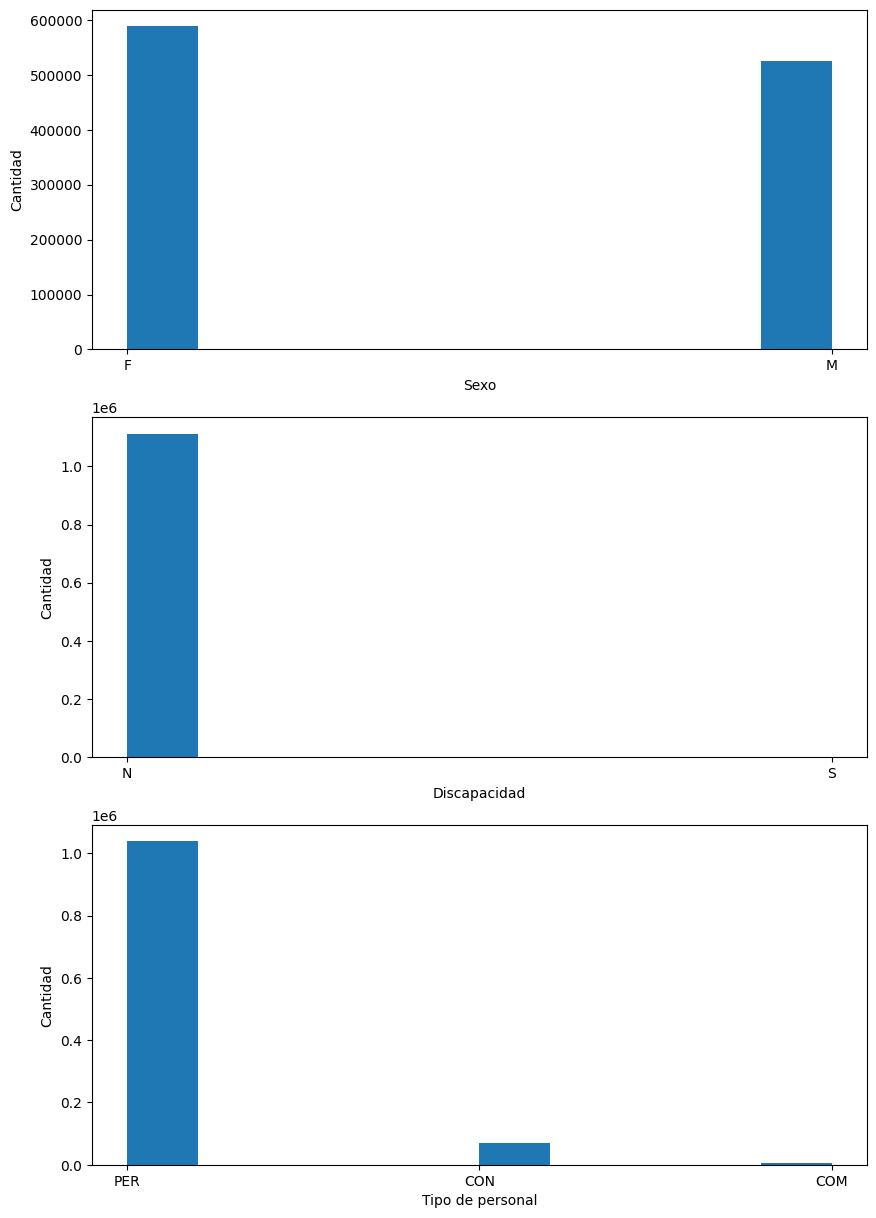

In [134]:
fig, axs = plt.subplots(3, figsize=(10, 15))

axs[0].hist(df_nomina_funcionario["sexo"])
axs[0].set_xlabel("Sexo")
axs[0].set_ylabel("Cantidad")
axs[0].set_xticklabels(axs[0].get_xticklabels())

axs[1].hist(df_nomina_funcionario["discapacidad"])
axs[1].set_xlabel("Discapacidad")
axs[1].set_ylabel("Cantidad")
axs[1].set_xticklabels(axs[1].get_xticklabels())

axs[2].hist(df_nomina_funcionario["tipoPersonal"])
axs[2].set_xlabel("Tipo de personal")
axs[2].set_ylabel("Cantidad")
axs[2].set_xticklabels(axs[2].get_xticklabels())

plt.show()

In [135]:
atributos

Index(['anio', 'mes', 'codigoNivel', 'descripcionNivel', 'codigoEntidad',
       'descripcionEntidad', 'codigoPrograma', 'descripcionPrograma',
       'codigoSubprograma', 'descripcionSubprograma', 'codigoProyecto',
       'descripcionProyecto', 'codigoUnidadResponsable',
       'descripcionUnidadResponsable', 'codigoObjetoGasto', 'conceptoGasto',
       'fuenteFinanciamiento', 'linea', 'codigoPersona', 'nombres',
       'apellidos', 'sexo', 'discapacidad', 'codigoCategoria', 'cargo',
       'horasCatedra', 'fechaIngreso', 'tipoPersonal', 'lugar',
       'montoPresupuestado', 'montoDevengado', 'mesCorte', 'anioCorte',
       'fechaCorte', 'nivelAbr', 'entidadAbr', 'programaAbr', 'subprogramaAbr',
       'proyectoAbr', 'unidadAbr'],
      dtype='object')

## 1.9 Mapa de calor de las variables redundantes

Creo un listado de las variables redundantes.

*Entrada: nombre de las variables redundantes.*

*Salida: listado de variables redundantes.*

*   [list](https://docs.python.org/3/library/functions.html#func-list)



In [136]:
list_var_redundantes = ["codigoNivel", "descripcionNivel", "nivelAbr", "codigoEntidad", "descripcionEntidad", "entidadAbr", "codigoPrograma", "descripcionPrograma", "programaAbr", "codigoProyecto", "descripcionProyecto", "proyectoAbr", "codigoUnidadResponsable", "descripcionUnidadResponsable", "unidadAbr", "codigoObjetoGasto", "conceptoGasto"]
list_var_redundantes


['codigoNivel',
 'descripcionNivel',
 'nivelAbr',
 'codigoEntidad',
 'descripcionEntidad',
 'entidadAbr',
 'codigoPrograma',
 'descripcionPrograma',
 'programaAbr',
 'codigoProyecto',
 'descripcionProyecto',
 'proyectoAbr',
 'codigoUnidadResponsable',
 'descripcionUnidadResponsable',
 'unidadAbr',
 'codigoObjetoGasto',
 'conceptoGasto']

Creo un listado que solo tengan aquellas variables redundantes que sean numericas.

*Entrada: listado de variables redundantes.*

*Salida: listado de variables que son numericas (enteros y flotantes)*


*   [dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)
*   [list](https://docs.python.org/3/library/functions.html#func-list)



In [137]:
list_var_numericas = [variable for variable in list_var_redundantes if df_nomina_funcionario[variable].dtypes in ('int64', 'float64')]
list_var_numericas

['codigoNivel',
 'codigoEntidad',
 'codigoPrograma',
 'codigoProyecto',
 'codigoUnidadResponsable',
 'codigoObjetoGasto']

Creo un listado que solo tengan aquellas variables redundantes que no sean numericas.

*Entrada: listado de variables redundantes.*

*Salida: listado de variables categoricas que no son numericas (cadenas/texto)*

*   [dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)
*   [list](https://docs.python.org/3/library/functions.html#func-list)


In [138]:
list_var_categoricas = [variable for variable in list_var_redundantes if variable not in list_var_numericas]
list_var_categoricas

['descripcionNivel',
 'nivelAbr',
 'descripcionEntidad',
 'entidadAbr',
 'descripcionPrograma',
 'programaAbr',
 'descripcionProyecto',
 'proyectoAbr',
 'descripcionUnidadResponsable',
 'unidadAbr',
 'conceptoGasto']

Convierto los valores de las variables categoricas a valores numericos. Asigno estos valores a nuevas variables que tiene el sufijo "_cat"

*Entrada: listado de variables categoricas definidas en el punto anterior.*

*Salida: dataframe que contiene las variables categoricas con el sufijo "_cat" pero con los valores convertidos a numeros*

*   [astype](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)
*   [categorical](https://pandas.pydata.org/docs/user_guide/categorical.html)
*   [list](https://docs.python.org/3/library/functions.html#func-list)



In [139]:
for var_categorica in  list_var_categoricas:
  df_nomina_funcionario[var_categorica] = df_nomina_funcionario[var_categorica].astype('category')
  df_nomina_funcionario[f"{var_categorica}_cat"] = df_nomina_funcionario[var_categorica].cat.codes

Muestro las nuevas variables de mi Dataset

*Entrada: listado de variables categoricas transformadas a valores numericos convertidas en el punto anterior*

*Salida: dataFrame mostrando solo las columnas recibidas como entrada*

*   [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)
*   [list](https://docs.python.org/3/library/functions.html#func-list)






In [140]:
list_var_categoricas_numericas = [variable + "_cat" for variable in list_var_categoricas]
df_nomina_funcionario[list_var_categoricas_numericas].head(5)

,descripcionNivel_cat,nivelAbr_cat,descripcionEntidad_cat,entidadAbr_cat,descripcionPrograma_cat,programaAbr_cat,descripcionProyecto_cat,proyectoAbr_cat,descripcionUnidadResponsable_cat,unidadAbr_cat,conceptoGasto_cat
0,1,4,28,38,5,18,154,73,210,254,0
1,1,4,28,38,5,18,0,24,182,57,6
2,1,4,28,38,5,18,0,24,182,57,6
3,1,4,28,38,5,18,118,72,210,254,0
4,1,4,28,38,5,18,118,72,210,254,0


Genero el mapa de calor que representa las correlaciones entre las variables redundante

*Entrada: matrix de correlacion generado a partir del listado de variables numericas y el listado de variables transformadas a valores numericos*

*Salida: mapa de calor que representa las correlaciones contenidas en la matrix de correlacion*

*   [corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)
*   [figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)
*   [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.htmlv)
*   [list](https://docs.python.org/3/library/functions.html#func-list)

<Axes: >

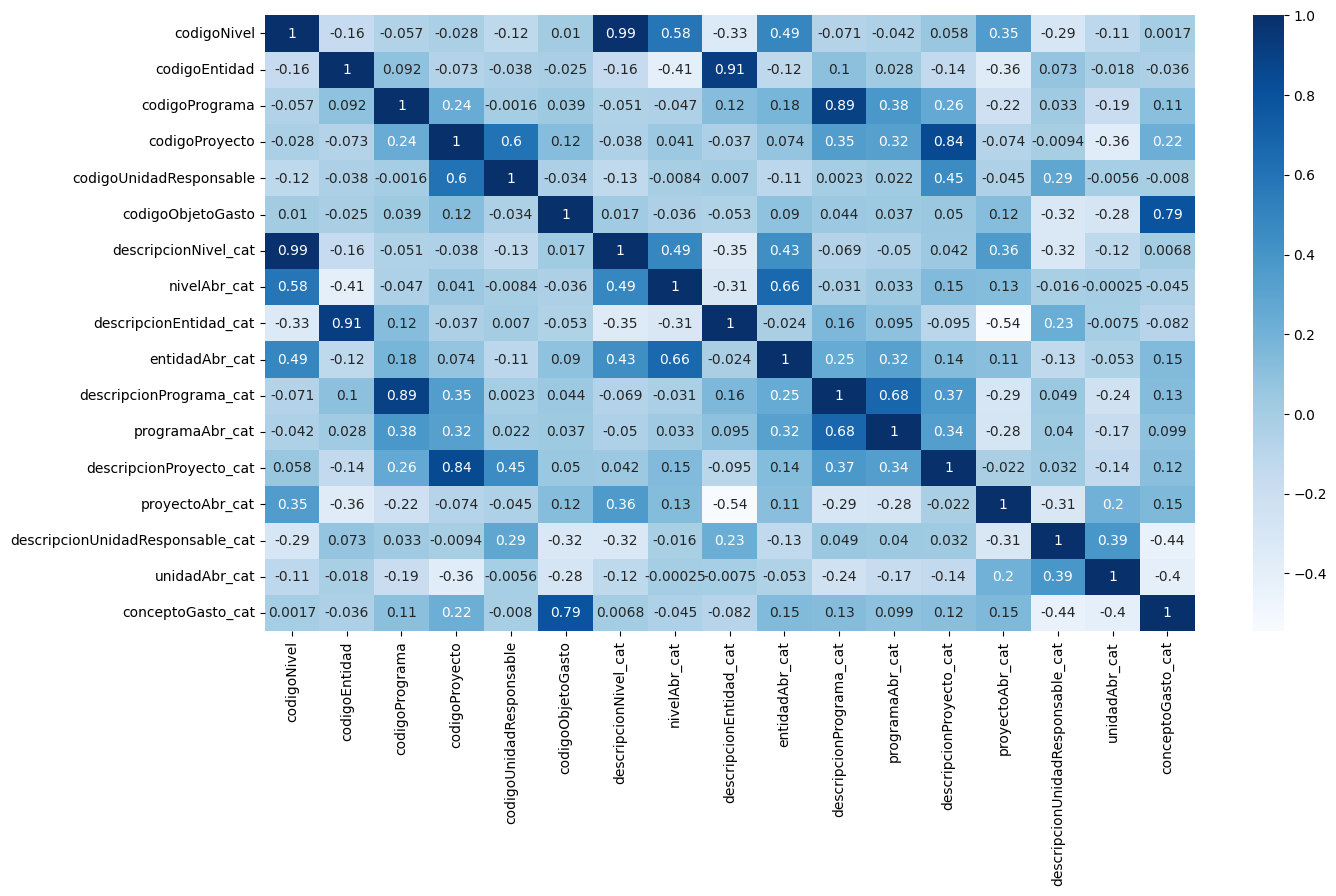

In [141]:
corr_df = df_nomina_funcionario[list_var_numericas + list_var_categoricas_numericas].corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_df, annot=True, cmap='Blues')

In [142]:
list_var_selec_redundantes = ["CodigoNivel", ]

## 1.10 Mapa de calor de las variables numericas y de alta cardinalidad

Creo un listado de las variables numericas y con alta cardinalidad (solo aquellas permitidas). Las demas variables excluyo.

*Entrada: listado de variables que son constantes, redundantes y las de alta cardinalidad a excluir.*

*Salida: listado de variables*

*   [list](https://docs.python.org/3/library/functions.html#func-list)

In [143]:
list_atributos = [atributo for atributo in atributos if atributo not in list_var_constantes and atributo not in list_var_redundantes and atributo not in list_var_alta_cardinalidad_a_excluir]
list_atributos

['fuenteFinanciamiento',
 'linea',
 'sexo',
 'discapacidad',
 'codigoCategoria',
 'cargo',
 'fechaIngreso',
 'tipoPersonal',
 'lugar',
 'montoPresupuestado',
 'montoDevengado']

Creo un listado que solo tengan aquellas variables que sean numericas

*Entrada: listado de variables*

*Salida: listado de variables que son numericas (enteros y flotantes)*


*   [dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)
*   [list](https://docs.python.org/3/library/functions.html#func-list)



In [144]:
list_atributos_numericos = [variable for variable in list_atributos if df_nomina_funcionario[variable].dtypes in ('int64', 'float64')]
list_atributos_numericos

['linea', 'montoPresupuestado', 'montoDevengado']

Creo un listado que solo tengan aquellas variables que no sean numericas.

*Entrada: listado de variables*

*Salida: listado de variables que no son numericas (cadenas/texto)*

*   [dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)
*   [list](https://docs.python.org/3/library/functions.html#func-list)

In [145]:
list_atributos_no_numericas = [variable for variable in list_atributos if df_nomina_funcionario[variable].dtypes not in ('int64', 'float64')]
list_atributos_no_numericas

['fuenteFinanciamiento',
 'sexo',
 'discapacidad',
 'codigoCategoria',
 'cargo',
 'fechaIngreso',
 'tipoPersonal',
 'lugar']

Convierto los valores de las variables no numericas a valores numericos. Asigno estos valores a nuevas variables que tiene el sufijo "_cat"

*Entrada: listado de variables definidas en el punto anterior.*

*Salida: dataframe que contiene las variables no numericas con el sufijo "_cat" pero con los valores convertidos a numeros*

*   [astype](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)
*   [categorical](https://pandas.pydata.org/docs/user_guide/categorical.html)
*   [list](https://docs.python.org/3/library/functions.html#func-list)



In [146]:
for var_no_numericas in  list_atributos_no_numericas:
  df_nomina_funcionario[var_no_numericas] = df_nomina_funcionario[var_no_numericas].astype('category')
  df_nomina_funcionario[f"{var_no_numericas}_cat"] = df_nomina_funcionario[var_no_numericas].cat.codes

Muestro las nuevas variables de mi Dataset

*Entrada: listado de variables transformadas a valores numericos convertidas en el punto anterior*

*Salida: dataFrame mostrando solo las columnas recibidas como entrada*

*   [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)
*   [list](https://docs.python.org/3/library/functions.html#func-list)

In [147]:
list_var_categoricas_numericas_2 = [variable + "_cat" for variable in list_atributos_no_numericas]
df_nomina_funcionario[list_var_categoricas_numericas_2].head(5)

,fuenteFinanciamiento_cat,sexo_cat,discapacidad_cat,codigoCategoria_cat,cargo_cat,fechaIngreso_cat,tipoPersonal_cat,lugar_cat
0,0,0,0,1363,1951,1172,2,-1
1,0,0,0,1365,1904,1172,2,-1
2,0,0,0,1365,1904,1172,2,-1
3,0,0,0,1365,1669,2734,2,-1
4,0,0,0,1365,1669,2734,2,-1


Genero el mapa de calor que representa las correlaciones entre las variables

*Entrada: matrix de correlacion generado a partir del listado de variables numericas y el listado de variables transformadas a valores numericos*

*Salida: mapa de calor que representa las correlaciones contenidas en la matrix de correlacion*

*   [corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)
*   [figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)
*   [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.htmlv)
*   [list](https://docs.python.org/3/library/functions.html#func-list)

<Axes: >

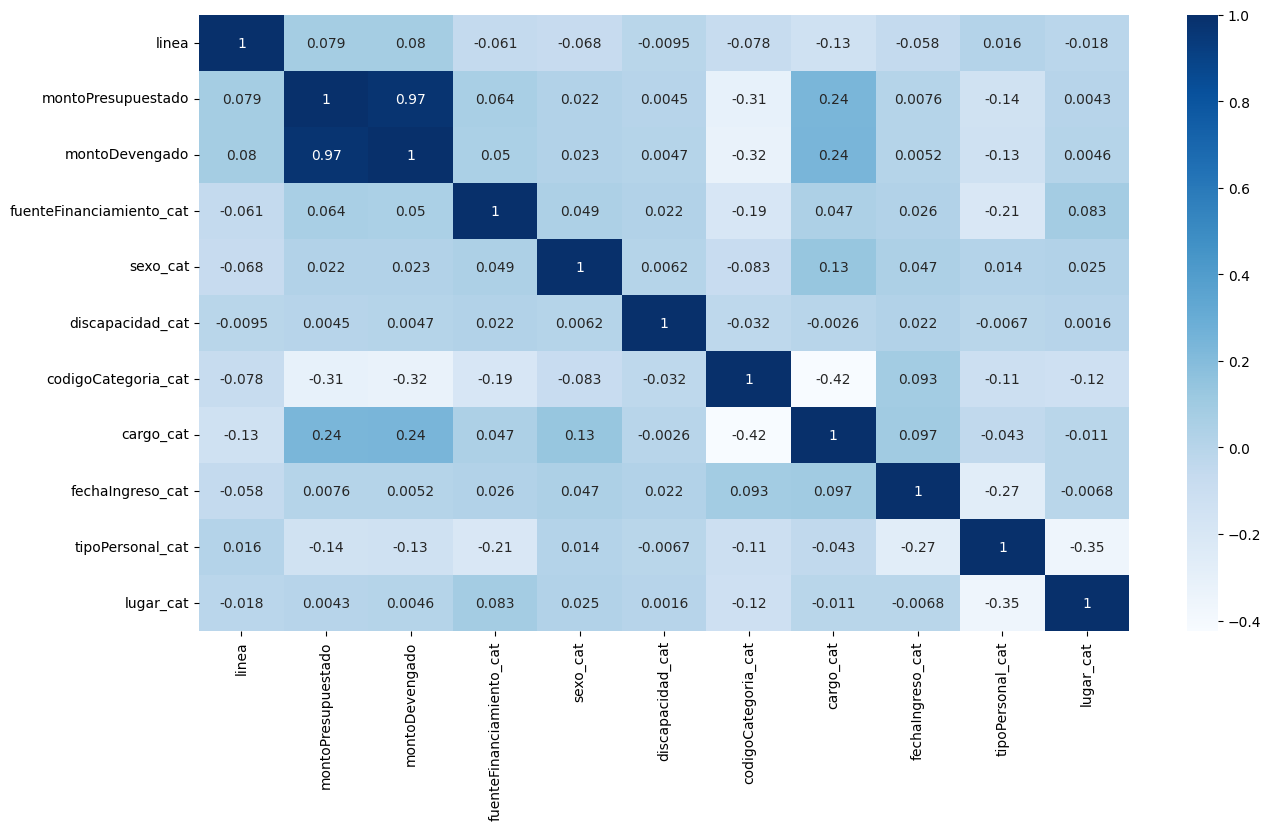

In [148]:
corr_df = df_nomina_funcionario[list_atributos_numericos + list_var_categoricas_numericas_2].corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_df, annot=True, cmap='Blues')

**Observacion 1.10.1**

> Las variables MontoPresupuestado y MontoDevengado tienen una alta correlación. Variable seleccionada: MontoDevengado.

## 1.11 Mapa de calor general

Genero el mapa de calor que representa las correlaciones entre las variables

*Entrada: matrix de correlacion generado a partir del listado de variables numericas y variables transformadas a valores numericos*

*Salida: mapa de calor que representa las correlaciones contenidas en la matrix de correlacion*

*   [corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)
*   [figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)
*   [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.htmlv)
*   [list](https://docs.python.org/3/library/functions.html#func-list)

<Axes: >

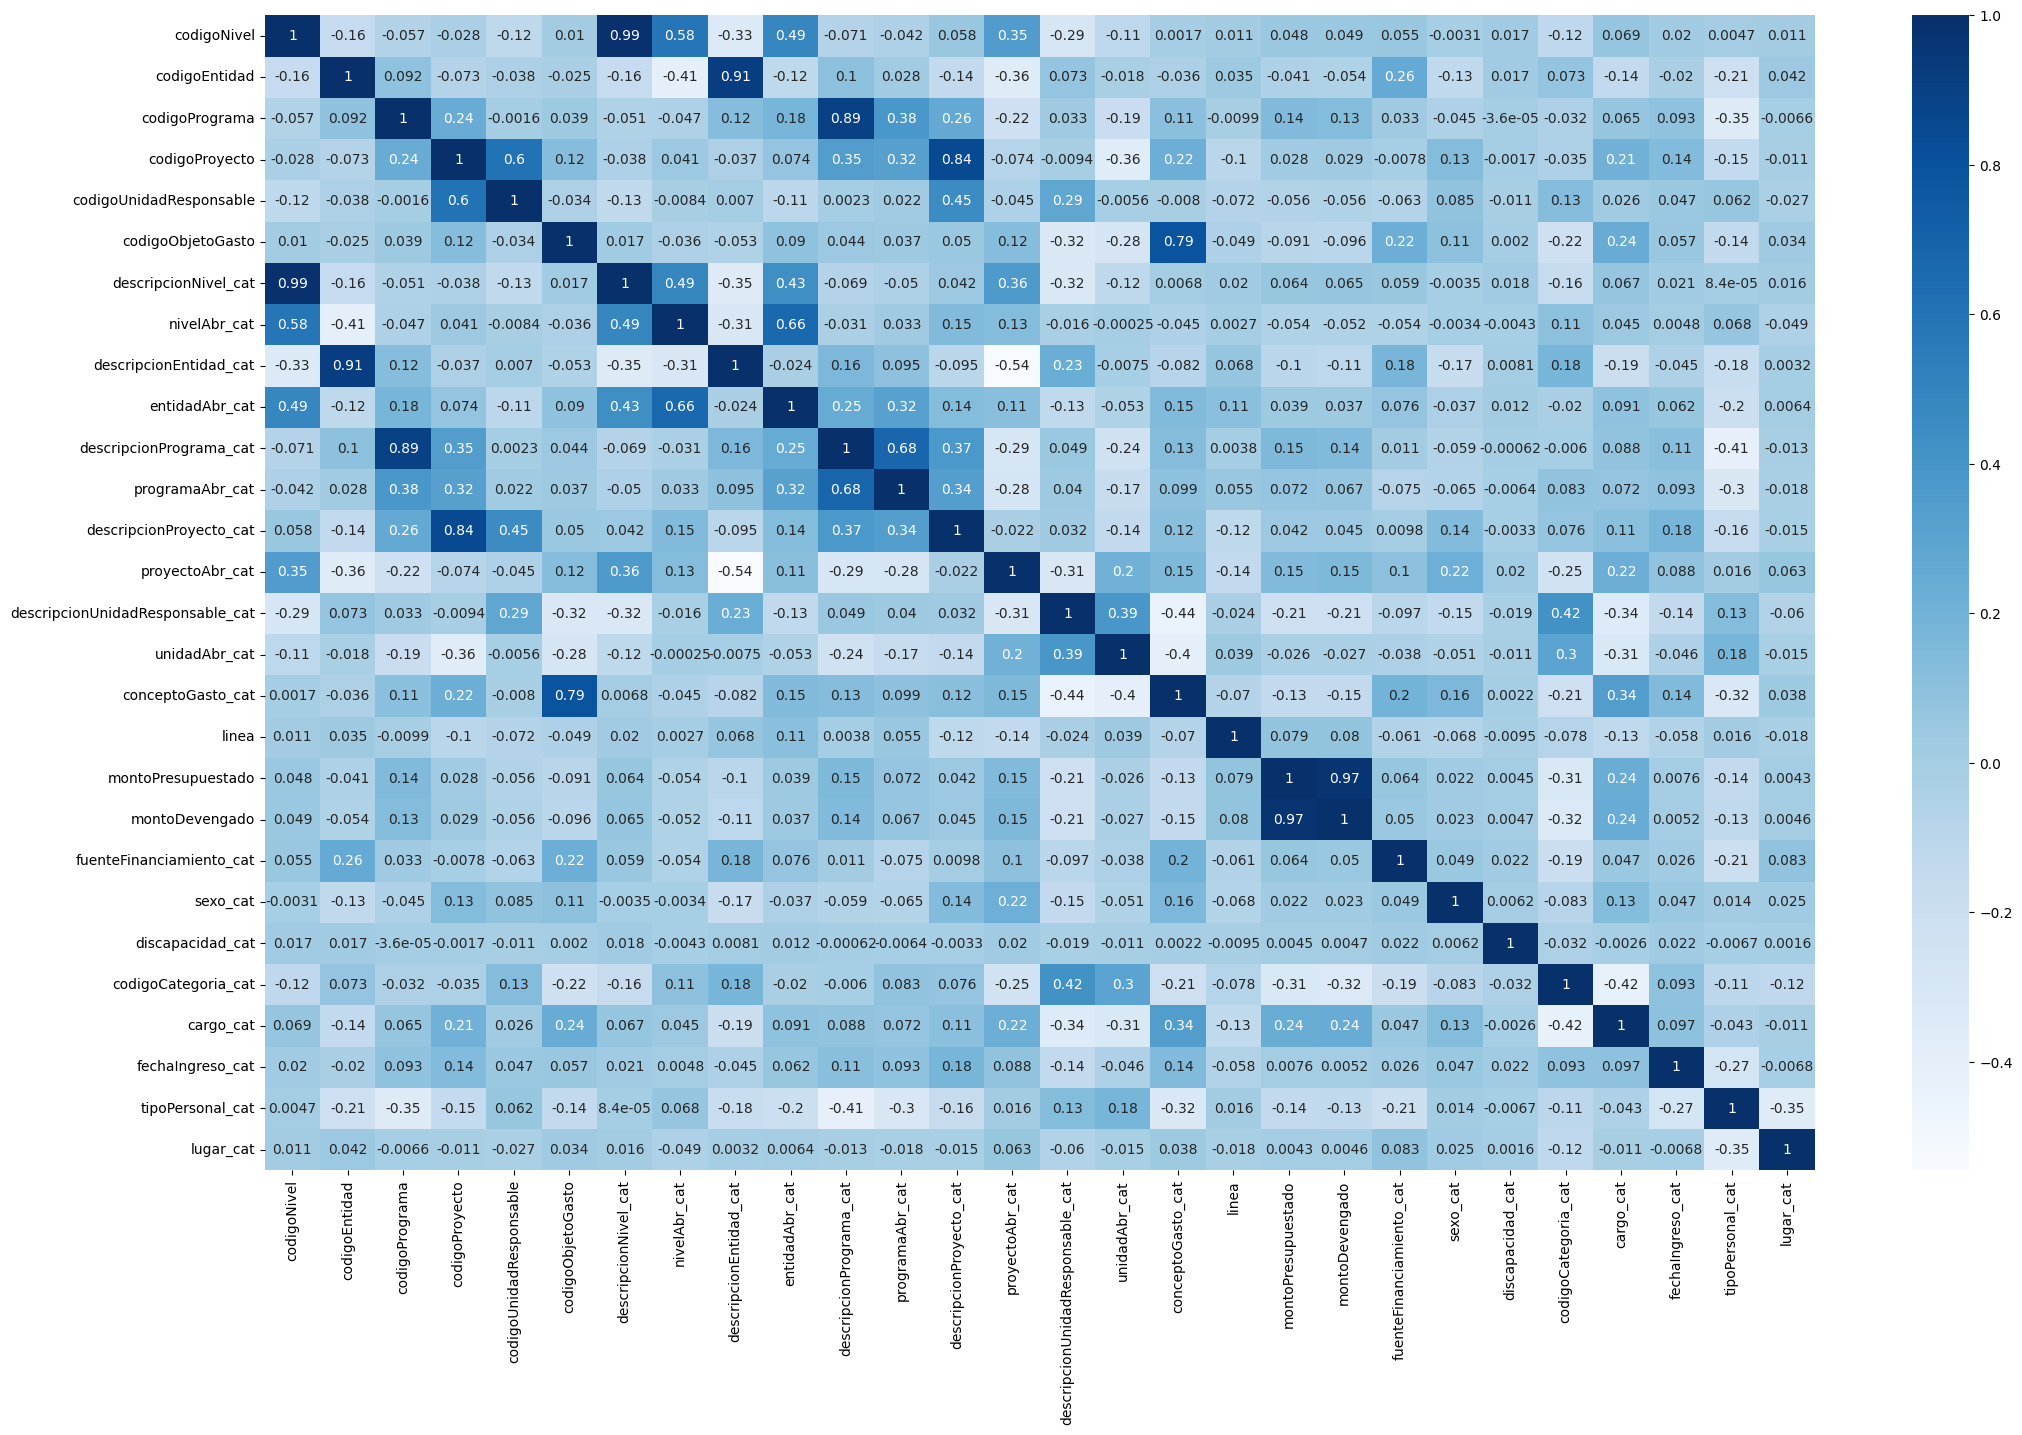

In [149]:
corr_df = df_nomina_funcionario[list_var_numericas + list_var_categoricas_numericas + list_atributos_numericos + list_var_categoricas_numericas_2].corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr_df, annot=True, cmap='Blues')

# 2.Preprocesamiento de datos

Creo un listado de las variables seleccionadas.

*Entrada: nombre de las variables seleccionadas.*

*Salida: listado de variables seleccionadas.*

*   [list](https://docs.python.org/3/library/functions.html#func-list)



In [150]:
list_var_seleccionadas = ["codigoNivel", "descripcionEntidad", "descripcionPrograma", "descripcionProyecto",  "descripcionUnidadResponsable", "codigoObjetoGasto", "montoDevengado"]
list_var_seleccionadas

['codigoNivel',
 'descripcionEntidad',
 'descripcionPrograma',
 'descripcionProyecto',
 'descripcionUnidadResponsable',
 'codigoObjetoGasto',
 'montoDevengado']

## 2.1 Eliminacion de variables

Elimino las constantes(variables) del Dataframe

*Entrada: lista de constantes(variables), se indica que la eliminación es a nivel de columnas*

*Salida: dataframe sin las constantes*

*   [drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)
*   [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)


In [151]:
df_pre_nomina_funcionario = df_pre_nomina_funcionario.drop(list_var_constantes, axis=1)
df_pre_nomina_funcionario.head()

,codigoNivel,descripcionNivel,codigoEntidad,descripcionEntidad,codigoPrograma,descripcionPrograma,codigoProyecto,descripcionProyecto,codigoUnidadResponsable,descripcionUnidadResponsable,...,fechaIngreso,tipoPersonal,lugar,montoPresupuestado,montoDevengado,nivelAbr,entidadAbr,programaAbr,proyectoAbr,unidadAbr
0,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,4,004-BRINDAR SERVICIO EDUCATIVO EN EL TERCER CI...,43,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,...,2000-01-01,PER,NaN,3632977,3632977,PODER EJECUTIVO,MEC,PC,BSETCEEBYEM,VEPAGE
1,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,1,001- GESTIÓN ADMINISTRATIVA INSTITUCIONAL,4,4-DIRECCION GENERAL DE ADMINISTRACION Y FINANZAS,...,2000-01-01,PER,NaN,698249,698249,PODER EJECUTIVO,MEC,PC,AG,DGA
2,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,1,001- GESTIÓN ADMINISTRATIVA INSTITUCIONAL,4,4-DIRECCION GENERAL DE ADMINISTRACION Y FINANZAS,...,2000-01-01,PER,NaN,227520,227520,PODER EJECUTIVO,MEC,PC,AG,DGA
3,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,3,003-BRINDAR SERVICIO EDUCATIVO EN PRIMER Y SEG...,43,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,...,2007-01-12,PER,NaN,3632977,3632977,PODER EJECUTIVO,MEC,PC,BSEPSCEEB,VEPAGE
4,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,3,003-BRINDAR SERVICIO EDUCATIVO EN PRIMER Y SEG...,43,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,...,2007-01-12,PER,NaN,3632977,3632977,PODER EJECUTIVO,MEC,PC,BSEPSCEEB,VEPAGE


Elimino las variables con alta cardinalidad excluidas del Dataframe

*Entrada: lista de variables con alta cardinalidad excluidas, se indica que la eliminación es a nivel de columnas*

*Salida: dataframe sin las variables con alta cardinalidad*

*   [drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)
*   [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)


In [152]:
df_pre_nomina_funcionario = df_pre_nomina_funcionario.drop(list_var_alta_cardinalidad_a_excluir, axis=1)
df_pre_nomina_funcionario.head()

,codigoNivel,descripcionNivel,codigoEntidad,descripcionEntidad,codigoPrograma,descripcionPrograma,codigoProyecto,descripcionProyecto,codigoUnidadResponsable,descripcionUnidadResponsable,...,fechaIngreso,tipoPersonal,lugar,montoPresupuestado,montoDevengado,nivelAbr,entidadAbr,programaAbr,proyectoAbr,unidadAbr
0,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,4,004-BRINDAR SERVICIO EDUCATIVO EN EL TERCER CI...,43,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,...,2000-01-01,PER,NaN,3632977,3632977,PODER EJECUTIVO,MEC,PC,BSETCEEBYEM,VEPAGE
1,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,1,001- GESTIÓN ADMINISTRATIVA INSTITUCIONAL,4,4-DIRECCION GENERAL DE ADMINISTRACION Y FINANZAS,...,2000-01-01,PER,NaN,698249,698249,PODER EJECUTIVO,MEC,PC,AG,DGA
2,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,1,001- GESTIÓN ADMINISTRATIVA INSTITUCIONAL,4,4-DIRECCION GENERAL DE ADMINISTRACION Y FINANZAS,...,2000-01-01,PER,NaN,227520,227520,PODER EJECUTIVO,MEC,PC,AG,DGA
3,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,3,003-BRINDAR SERVICIO EDUCATIVO EN PRIMER Y SEG...,43,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,...,2007-01-12,PER,NaN,3632977,3632977,PODER EJECUTIVO,MEC,PC,BSEPSCEEB,VEPAGE
4,12,12-PODER EJECUTIVO,7,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,1,001 - PROGRAMA CENTRAL,3,003-BRINDAR SERVICIO EDUCATIVO EN PRIMER Y SEG...,43,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,...,2007-01-12,PER,NaN,3632977,3632977,PODER EJECUTIVO,MEC,PC,BSEPSCEEB,VEPAGE


Elimino las variables redundantes que no fueron seleccionadas del Dataframe

*Entrada: lista de variables redundantes que no fueron seleccionadas, se indica que la eliminación es a nivel de columnas*

*Salida: dataframe sin las variables redundantes que no fueron seleccionadas*

*   [list](https://docs.python.org/3/library/functions.html#func-list)
*   [drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)
*   [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)


In [153]:
list_var_redundantes_a_excluir = [variable for variable in list_var_redundantes if variable not in list_var_seleccionadas]
df_pre_nomina_funcionario = df_pre_nomina_funcionario.drop(list_var_redundantes_a_excluir, axis=1)
df_pre_nomina_funcionario.head()

,codigoNivel,descripcionEntidad,descripcionPrograma,descripcionProyecto,descripcionUnidadResponsable,codigoObjetoGasto,fuenteFinanciamiento,linea,sexo,discapacidad,codigoCategoria,cargo,fechaIngreso,tipoPersonal,lugar,montoPresupuestado,montoDevengado
0,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,004-BRINDAR SERVICIO EDUCATIVO EN EL TERCER CI...,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,111,10-RECURSOS DEL TESORO,561.0,F,N,LCC,PROFESOR MJ III,2000-01-01,PER,NaN,3632977,3632977
1,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,001- GESTIÓN ADMINISTRATIVA INSTITUCIONAL,4-DIRECCION GENERAL DE ADMINISTRACION Y FINANZAS,132,10-RECURSOS DEL TESORO,102.0,F,N,LCE,PROFESOR DE GRADO,2000-01-01,PER,NaN,698249,698249
2,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,001- GESTIÓN ADMINISTRATIVA INSTITUCIONAL,4-DIRECCION GENERAL DE ADMINISTRACION Y FINANZAS,132,10-RECURSOS DEL TESORO,102.0,F,N,LCE,PROFESOR DE GRADO,2000-01-01,PER,NaN,227520,227520
3,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,003-BRINDAR SERVICIO EDUCATIVO EN PRIMER Y SEG...,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,111,10-RECURSOS DEL TESORO,21.0,F,N,LCE,PROF. DE GRADO,2007-01-12,PER,NaN,3632977,3632977
4,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,003-BRINDAR SERVICIO EDUCATIVO EN PRIMER Y SEG...,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,111,10-RECURSOS DEL TESORO,21.0,F,N,LCE,PROF. DE GRADO,2007-01-12,PER,NaN,3632977,3632977


Elimino variables en base a la observación 1.10.1

*Entrada: lista de variables, se indica que la eliminación es a nivel de columnas*

*Salida: dataframe sin las variables ingresadas en la entrada*

*   [list](https://docs.python.org/3/library/functions.html#func-list)
*   [drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)
*   [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)

In [154]:
list_var_eliminar = ["montoPresupuestado"]
df_pre_nomina_funcionario = df_pre_nomina_funcionario.drop(list_var_eliminar, axis=1)
df_pre_nomina_funcionario.head()

,codigoNivel,descripcionEntidad,descripcionPrograma,descripcionProyecto,descripcionUnidadResponsable,codigoObjetoGasto,fuenteFinanciamiento,linea,sexo,discapacidad,codigoCategoria,cargo,fechaIngreso,tipoPersonal,lugar,montoDevengado
0,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,004-BRINDAR SERVICIO EDUCATIVO EN EL TERCER CI...,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,111,10-RECURSOS DEL TESORO,561.0,F,N,LCC,PROFESOR MJ III,2000-01-01,PER,NaN,3632977
1,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,001- GESTIÓN ADMINISTRATIVA INSTITUCIONAL,4-DIRECCION GENERAL DE ADMINISTRACION Y FINANZAS,132,10-RECURSOS DEL TESORO,102.0,F,N,LCE,PROFESOR DE GRADO,2000-01-01,PER,NaN,698249
2,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,001- GESTIÓN ADMINISTRATIVA INSTITUCIONAL,4-DIRECCION GENERAL DE ADMINISTRACION Y FINANZAS,132,10-RECURSOS DEL TESORO,102.0,F,N,LCE,PROFESOR DE GRADO,2000-01-01,PER,NaN,227520
3,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,003-BRINDAR SERVICIO EDUCATIVO EN PRIMER Y SEG...,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,111,10-RECURSOS DEL TESORO,21.0,F,N,LCE,PROF. DE GRADO,2007-01-12,PER,NaN,3632977
4,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,003-BRINDAR SERVICIO EDUCATIVO EN PRIMER Y SEG...,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,111,10-RECURSOS DEL TESORO,21.0,F,N,LCE,PROF. DE GRADO,2007-01-12,PER,NaN,3632977


## 2.2 Creación de nuevas variables

Creo un nueva variable a partir de una variable existente en el Dataframe

*Entrada: dos series que contienen la fecha de ingreso y la fecha actual ambas convertidas en un tipo datetime64*

*Salida: dataframe que contiene una nueva variable de antiguedad laboral en meses (numero entero)*

*   [to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)
*   [today](https://docs.python.org/fr/3/library/datetime.html#datetime.date.today)
*   [to_period](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.to_period.html)
*   [astype](https://pandas.pydata.org/docs/reference/api/pandas.Series.astype.html)
*   [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)



In [155]:
df_pre_nomina_funcionario["fechaIngreso"] = pd.to_datetime(df_pre_nomina_funcionario["fechaIngreso"], format='%Y-%m-%d')
df_pre_nomina_funcionario["fechaActual"] = pd.to_datetime(dt.date.today(), format='%Y-%m-%d')

df_pre_nomina_funcionario['antiguedadMeses'] = df_pre_nomina_funcionario["fechaActual"].dt.to_period('M').astype("int64") - df_pre_nomina_funcionario["fechaIngreso"].dt.to_period('M').astype("int64")
df_pre_nomina_funcionario.head()

,codigoNivel,descripcionEntidad,descripcionPrograma,descripcionProyecto,descripcionUnidadResponsable,codigoObjetoGasto,fuenteFinanciamiento,linea,sexo,discapacidad,codigoCategoria,cargo,fechaIngreso,tipoPersonal,lugar,montoDevengado,fechaActual,antiguedadMeses
0,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,004-BRINDAR SERVICIO EDUCATIVO EN EL TERCER CI...,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,111,10-RECURSOS DEL TESORO,561.0,F,N,LCC,PROFESOR MJ III,2000-01-01,PER,NaN,3632977,2023-10-08,285
1,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,001- GESTIÓN ADMINISTRATIVA INSTITUCIONAL,4-DIRECCION GENERAL DE ADMINISTRACION Y FINANZAS,132,10-RECURSOS DEL TESORO,102.0,F,N,LCE,PROFESOR DE GRADO,2000-01-01,PER,NaN,698249,2023-10-08,285
2,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,001- GESTIÓN ADMINISTRATIVA INSTITUCIONAL,4-DIRECCION GENERAL DE ADMINISTRACION Y FINANZAS,132,10-RECURSOS DEL TESORO,102.0,F,N,LCE,PROFESOR DE GRADO,2000-01-01,PER,NaN,227520,2023-10-08,285
3,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,003-BRINDAR SERVICIO EDUCATIVO EN PRIMER Y SEG...,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,111,10-RECURSOS DEL TESORO,21.0,F,N,LCE,PROF. DE GRADO,2007-01-12,PER,NaN,3632977,2023-10-08,201
4,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,003-BRINDAR SERVICIO EDUCATIVO EN PRIMER Y SEG...,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,111,10-RECURSOS DEL TESORO,21.0,F,N,LCE,PROF. DE GRADO,2007-01-12,PER,NaN,3632977,2023-10-08,201


Elimino las variables de tipo fecha del Dataframe

*Entrada: lista de variables de tipo fecha, se indica que la eliminación es a nivel de columnas*

*Salida: dataframe sin las variables de tipo fecha*

*   [list](https://docs.python.org/3/library/functions.html#func-list)
*   [drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)
*   [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)


In [156]:
list_var_fecha = ["fechaIngreso", "fechaActual"]
df_pre_nomina_funcionario = df_pre_nomina_funcionario.drop(list_var_fecha, axis=1)
df_pre_nomina_funcionario.head()

,codigoNivel,descripcionEntidad,descripcionPrograma,descripcionProyecto,descripcionUnidadResponsable,codigoObjetoGasto,fuenteFinanciamiento,linea,sexo,discapacidad,codigoCategoria,cargo,tipoPersonal,lugar,montoDevengado,antiguedadMeses
0,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,004-BRINDAR SERVICIO EDUCATIVO EN EL TERCER CI...,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,111,10-RECURSOS DEL TESORO,561.0,F,N,LCC,PROFESOR MJ III,PER,NaN,3632977,285
1,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,001- GESTIÓN ADMINISTRATIVA INSTITUCIONAL,4-DIRECCION GENERAL DE ADMINISTRACION Y FINANZAS,132,10-RECURSOS DEL TESORO,102.0,F,N,LCE,PROFESOR DE GRADO,PER,NaN,698249,285
2,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,001- GESTIÓN ADMINISTRATIVA INSTITUCIONAL,4-DIRECCION GENERAL DE ADMINISTRACION Y FINANZAS,132,10-RECURSOS DEL TESORO,102.0,F,N,LCE,PROFESOR DE GRADO,PER,NaN,227520,285
3,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,003-BRINDAR SERVICIO EDUCATIVO EN PRIMER Y SEG...,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,111,10-RECURSOS DEL TESORO,21.0,F,N,LCE,PROF. DE GRADO,PER,NaN,3632977,201
4,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,003-BRINDAR SERVICIO EDUCATIVO EN PRIMER Y SEG...,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,111,10-RECURSOS DEL TESORO,21.0,F,N,LCE,PROF. DE GRADO,PER,NaN,3632977,201


## 2.3 Tratamiento de valores faltantes

Inputo valores a una variable con valores faltantes

*Entrada: diccionario que contiene el nombre de la variable(clave del dic) y el valor a inputar(valor del dic)*

*Salida: dataframe que contiene la variable con el valor ya inputado*

*   [dictionaries](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)
*   [fillna](https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html)
*   [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)


In [157]:
dic_valores_inputar = {"linea": -1}
df_pre_nomina_funcionario = df_pre_nomina_funcionario.fillna(value=dic_valores_inputar)
df_pre_nomina_funcionario.head()

,codigoNivel,descripcionEntidad,descripcionPrograma,descripcionProyecto,descripcionUnidadResponsable,codigoObjetoGasto,fuenteFinanciamiento,linea,sexo,discapacidad,codigoCategoria,cargo,tipoPersonal,lugar,montoDevengado,antiguedadMeses
0,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,004-BRINDAR SERVICIO EDUCATIVO EN EL TERCER CI...,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,111,10-RECURSOS DEL TESORO,561.0,F,N,LCC,PROFESOR MJ III,PER,NaN,3632977,285
1,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,001- GESTIÓN ADMINISTRATIVA INSTITUCIONAL,4-DIRECCION GENERAL DE ADMINISTRACION Y FINANZAS,132,10-RECURSOS DEL TESORO,102.0,F,N,LCE,PROFESOR DE GRADO,PER,NaN,698249,285
2,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,001- GESTIÓN ADMINISTRATIVA INSTITUCIONAL,4-DIRECCION GENERAL DE ADMINISTRACION Y FINANZAS,132,10-RECURSOS DEL TESORO,102.0,F,N,LCE,PROFESOR DE GRADO,PER,NaN,227520,285
3,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,003-BRINDAR SERVICIO EDUCATIVO EN PRIMER Y SEG...,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,111,10-RECURSOS DEL TESORO,21.0,F,N,LCE,PROF. DE GRADO,PER,NaN,3632977,201
4,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,003-BRINDAR SERVICIO EDUCATIVO EN PRIMER Y SEG...,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,111,10-RECURSOS DEL TESORO,21.0,F,N,LCE,PROF. DE GRADO,PER,NaN,3632977,201


**Observacion 2.3.1**

> Recordemos que la linea se refiere al código presupuestario asignado a una categoría en la Ley de Presupuesto General de la Nación. Se procede a imputar un valor negativo para indicar que los registro no tienen asignado una linea.

Elimino variables del Dataframe

*Entrada: lista de variables, se indica que la eliminación es a nivel de columnas*

*Salida: dataframe sin las variables ingresadas en la entrada*

*   [list](https://docs.python.org/3/library/functions.html#func-list)
*   [drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)
*   [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)

In [158]:
list_var_eliminar = ["lugar"]
df_pre_nomina_funcionario = df_pre_nomina_funcionario.drop(list_var_eliminar, axis=1)
df_pre_nomina_funcionario.head()

,codigoNivel,descripcionEntidad,descripcionPrograma,descripcionProyecto,descripcionUnidadResponsable,codigoObjetoGasto,fuenteFinanciamiento,linea,sexo,discapacidad,codigoCategoria,cargo,tipoPersonal,montoDevengado,antiguedadMeses
0,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,004-BRINDAR SERVICIO EDUCATIVO EN EL TERCER CI...,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,111,10-RECURSOS DEL TESORO,561.0,F,N,LCC,PROFESOR MJ III,PER,3632977,285
1,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,001- GESTIÓN ADMINISTRATIVA INSTITUCIONAL,4-DIRECCION GENERAL DE ADMINISTRACION Y FINANZAS,132,10-RECURSOS DEL TESORO,102.0,F,N,LCE,PROFESOR DE GRADO,PER,698249,285
2,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,001- GESTIÓN ADMINISTRATIVA INSTITUCIONAL,4-DIRECCION GENERAL DE ADMINISTRACION Y FINANZAS,132,10-RECURSOS DEL TESORO,102.0,F,N,LCE,PROFESOR DE GRADO,PER,227520,285
3,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,003-BRINDAR SERVICIO EDUCATIVO EN PRIMER Y SEG...,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,111,10-RECURSOS DEL TESORO,21.0,F,N,LCE,PROF. DE GRADO,PER,3632977,201
4,12,007-MINISTERIO DE EDUCACIÓN Y CIENCIAS,001 - PROGRAMA CENTRAL,003-BRINDAR SERVICIO EDUCATIVO EN PRIMER Y SEG...,43-VICEMINISTERIO DE EDUCACIÓN BÁSICA,111,10-RECURSOS DEL TESORO,21.0,F,N,LCE,PROF. DE GRADO,PER,3632977,201


**Observacion 2.3.3**

> Recordemos que el lugar describe el Organismo y Entidad del estado del cual es originario el funcionario en Comisión de Servicio. Este campo sólo es pertinente si el movimiento corresponde a traslados temporales o definitivos. Se procede a eliminar esta columna ya que inputar un valor implica que el 99.6 % de los registros tendran el mismo valor (1.109.249 filas).

## 2.4 Codificación de variables

Creo un listado que solo tengan aquellas variables que no sean numericas.

*Entrada: listado de variables de mi Dataframe.*

*Salida: listado de variables no numericas (cadenas/texto)*

*   [dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)
*   [list](https://docs.python.org/3/library/functions.html#func-list)


In [159]:
list_var_no_numericas = [variable for variable in list(df_pre_nomina_funcionario.columns.values) if df_pre_nomina_funcionario[variable].dtypes not in ('int64', 'float64')]
list_var_no_numericas

['descripcionEntidad',
 'descripcionPrograma',
 'descripcionProyecto',
 'descripcionUnidadResponsable',
 'fuenteFinanciamiento',
 'sexo',
 'discapacidad',
 'codigoCategoria',
 'cargo',
 'tipoPersonal']

Convierto los valores de las variables no numericas a valores numericos.

*Entrada: lista de variables no numericas.*

*Salida: dataframe que contiene las variables no numericas pero con los valores convertidos a numeros*

*   [astype](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)
*   [categorical](https://pandas.pydata.org/docs/user_guide/categorical.html)
*   [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)



In [161]:
for var_no_numerica in list_var_no_numericas:
  df_pre_nomina_funcionario[var_no_numerica] = df_pre_nomina_funcionario[var_no_numerica].astype('category')
  df_pre_nomina_funcionario[var_no_numerica] = df_pre_nomina_funcionario[var_no_numerica].cat.codes
df_pre_nomina_funcionario.head()

,codigoNivel,descripcionEntidad,descripcionPrograma,descripcionProyecto,descripcionUnidadResponsable,codigoObjetoGasto,fuenteFinanciamiento,linea,sexo,discapacidad,codigoCategoria,cargo,tipoPersonal,montoDevengado,antiguedadMeses
0,12,28,5,154,210,111,0,561.0,0,0,1363,1952,2,3632977,285
1,12,28,5,0,182,132,0,102.0,0,0,1365,1905,2,698249,285
2,12,28,5,0,182,132,0,102.0,0,0,1365,1905,2,227520,285
3,12,28,5,118,210,111,0,21.0,0,0,1365,1670,2,3632977,201
4,12,28,5,118,210,111,0,21.0,0,0,1365,1670,2,3632977,201
